In [1]:
rm(list = ls())

source("base/it-402-dc-data_initial_exploration-base.r")
source("base/common_interaction.r")


library(tidyverse)
library(readxl)

library(khroma)
library(RColorBrewer)

#library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




https://www.gov.scot/publications/initial-teacher-education-figures-2016-2018  
https://www.gov.scot/publications/initial-teacher-education-2018-student-teacher-intake-statistics

https://www.gov.scot/publications/initial-teacher-education-student-teacher-intake-2019/pages/pgde-and-other-routes-student-teacher-intake-figures
https://www.gov.scot/publications/initial-teacher-education-2020-student-teacher-intake-statistics/pages/pgde-secondary-and-alternative-route-intake-figures

https://www.gov.scot/publications/teacher-workforce-planning-advisory-group-initial-teacher-education-intake-figures-2021
https://www.gov.scot/publications/teacher-workforce-planning-advisory-group-initial-teacher-education-intake-figures-2022
https://www.gov.scot/publications/teacher-workforce-planning-advisory-group-initial-teacher-education-intake-figures-2023
https://www.gov.scot/publications/teacher-workforce-planning-advisory-group-initial-teacher-education-intake-figures-2024

## <span style = "color:maroon">Initial Teacher Education Intake &ndash; 2016&mdash;18</span>

In [2]:
initial_intake_university <- read_lines(
"
Initial teacher education targets and intakes	2016-2017 Target	2016-2017 Intake	2017-2018 Target	2017-2018 Intake
Undergraduate Primary	710	756	710	774
Postgraduate Diploma in Education (PGDE) Primary	1,230	1,248	1,186	1,259
Undergraduate secondary	187	169	187	170
Postgraduate Diploma in Education (PGDE) Secondary	1,350	1,198	1,750	1,226
Undergraduate combined degree	210	220	225	228
Total	3,687	3,591	4,058	3,657
New Routes (provisional intake)*	 	 	 	204
Total	 	 	 	3,861
",
skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake") %>%
    
    glimpse()

# '*' not including 77 already counted in university returns

Rows: 9
Columns: 1
$ intake <chr> "Initial teacher education targets and intakes\t2016-2017 Targe…


In [3]:
initial_intake_university

intake
<chr>
Initial teacher education targets and intakes 2016-2017 Target 2016-2017 Intake 2017-2018 Target 2017-2018 Intake
Undergraduate Primary 710 756 710 774
"Postgraduate Diploma in Education (PGDE) Primary 1,230 1,248 1,186 1,259"
Undergraduate secondary 187 169 187 170
"Postgraduate Diploma in Education (PGDE) Secondary 1,350 1,198 1,750 1,226"
Undergraduate combined degree 210 220 225 228
"Total 3,687 3,591 4,058 3,657"
New Routes (provisional intake)* 204
"Total 3,861"


In [4]:
initial_intake_university <- initial_intake_university %>%
    #mutate(across(intake, str_squish),
    #       across(intake, ~ gsub("(^[^[:digit:]]+).+", "\\1", .), .names = "teacher_type"),
    #       across(intake, ~ gsub("^[^[:digit:]]+([[:digit:][:punct:]]+\\s([[:alpha:]]+)?)\\s.+", "\\1", .), .names = "target1"),
    #       across(intake, ~ gsub("^[^[:digit:]]+", "", .), .names = "remainder"),
    #      ) %>%

    separate_wider_delim(intake, regex("\\t"), names = c("teacher_type", "target_1", "intake_1", "target_2", "intake_2"),
                         #too_few = "debug", too_many = "debug"
                        ) %>%
    mutate(across(where(is.character), str_squish))

In [5]:
initial_intake_university

teacher_type,target_1,intake_1,target_2,intake_2
<chr>,<chr>,<chr>,<chr>,<chr>
Initial teacher education targets and intakes,2016-2017 Target,2016-2017 Intake,2017-2018 Target,2017-2018 Intake
Undergraduate Primary,710,756,710,774
Postgraduate Diploma in Education (PGDE) Primary,"1,230","1,248","1,186","1,259"
Undergraduate secondary,187,169,187,170
Postgraduate Diploma in Education (PGDE) Secondary,"1,350","1,198","1,750","1,226"
Undergraduate combined degree,210,220,225,228
Total,"3,687","3,591","4,058","3,657"
New Routes (provisional intake)*,,,,204
Total,,,,"3,861"


In [6]:
names(initial_intake_university) <- as.character(initial_intake_university[1, ])

initial_intake_university <- initial_intake_university %>%
    filter(row_number() != 1) %>%
    rename_with(~ snakecase::to_upper_camel_case(.)) %>%

    mutate(across(matches("^\\d{4}"), parse_number),
           across(matches("^\\d{4}"), as.integer)
          )

initial_intake_university

InitialTeacherEducationTargetsAndIntakes,2016_2017Target,2016_2017Intake,2017_2018Target,2017_2018Intake
<chr>,<int>,<int>,<int>,<int>
Undergraduate Primary,710,756,710,774
Postgraduate Diploma in Education (PGDE) Primary,1230,1248,1186,1259
Undergraduate secondary,187,169,187,170
Postgraduate Diploma in Education (PGDE) Secondary,1350,1198,1750,1226
Undergraduate combined degree,210,220,225,228
Total,3687,3591,4058,3657
New Routes (provisional intake)*,NA,NA,NA,204
Total,NA,NA,NA,3861


In [7]:
initial_intake_university <- initial_intake_university %>%
    rename(ITECategory = InitialTeacherEducationTargetsAndIntakes) %>%
    pivot_longer(cols = !ITECategory, 
                 names_to = "year", values_to = "count",
                 values_drop_na = TRUE
                ) %>%

    separate_wider_regex(year, c(year = "[[:digit:][:punct:]]+", label = "\\w+")) %>%

    filter(ITECategory != "Total") %>%
    pivot_wider(names_from = label, values_from = count)

initial_intake_university

ITECategory,year,Target,Intake
<chr>,<chr>,<int>,<int>
Undergraduate Primary,2016_2017,710,756
Undergraduate Primary,2017_2018,710,774
Postgraduate Diploma in Education (PGDE) Primary,2016_2017,1230,1248
Postgraduate Diploma in Education (PGDE) Primary,2017_2018,1186,1259
Undergraduate secondary,2016_2017,187,169
Undergraduate secondary,2017_2018,187,170
Postgraduate Diploma in Education (PGDE) Secondary,2016_2017,1350,1198
Postgraduate Diploma in Education (PGDE) Secondary,2017_2018,1750,1226
Undergraduate combined degree,2016_2017,210,220


In [8]:
#Initial Teacher Education (ITE) PGDE Secondary

initial_intake_pgde_secondary <- 
read_lines(
"
Subject	Scottish Funding Council (SFC) target 2016/17	Scottish Funding Council (SFC) target 2017-2018	ITE intake 2016-2017	ITE intake 2017-2018	Intake as % of SFC target 2016-2017	Intakes as % of SFC target 2017-2018
Art	89	112	86	97	97	87
Biology	91	111	86	101	95	91
Business Education	64	88	62	78	97	89
Chemistry	75	86	81	72	108	84
Computing	52	60	41	41	79	68
Drama	30	35	26	28	87	80
English	194	247	163	155	84	63
Gaelic	5	5	4	0	80	0
Geography	45	55	57	53	127	96
History	48	58	66	71	138	122
Home Economics	70	106	47	57	67	54
Maths	179	237	128	112	72	47
Modern Languages	105	135	95	86	90	64
Modern Studies	44	52	47	60	107	115
Music	41	57	22	33	54	58
Physical Education	33	46	38	48	115	104
Physics	60	77	61	56	102	73
Psychology*	 	8	17	8	 	100
Religious Education	39	51	24	34	62	67
Technological Education	86	124	47	36	55	29
Secondary PDGE total	1350	1750	1198	1226	89	70
",
skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake") 


initial_intake_pgde_secondary

# '*'- New subject at Strathclyde University in 2016 - no SFC target set in 2016

intake
<chr>
Subject Scottish Funding Council (SFC) target 2016/17 Scottish Funding Council (SFC) target 2017-2018 ITE intake 2016-2017 ITE intake 2017-2018 Intake as % of SFC target 2016-2017 Intakes as % of SFC target 2017-2018
Art 89 112 86 97 97 87
Biology 91 111 86 101 95 91
Business Education 64 88 62 78 97 89
Chemistry 75 86 81 72 108 84
Computing 52 60 41 41 79 68
Drama 30 35 26 28 87 80
English 194 247 163 155 84 63
Gaelic 5 5 4 0 80 0


In [9]:
initial_intake_pgde_secondary <- initial_intake_pgde_secondary %>%

    separate_wider_delim(intake, regex("\\t"), names = c("subject", "target_1", "target_2", "intake_1", "intake_2"), 
                                                         too_many = "drop" #"intake_to_target_1", "intake_to_target_2"
                         #too_few = "debug", too_many = "debug"
                        ) %>%
    mutate(across(where(is.character), str_squish))

initial_intake_pgde_secondary

subject,target_1,target_2,intake_1,intake_2
<chr>,<chr>,<chr>,<chr>,<chr>
Subject,Scottish Funding Council (SFC) target 2016/17,Scottish Funding Council (SFC) target 2017-2018,ITE intake 2016-2017,ITE intake 2017-2018
Art,89,112,86,97
Biology,91,111,86,101
Business Education,64,88,62,78
Chemistry,75,86,81,72
Computing,52,60,41,41
Drama,30,35,26,28
English,194,247,163,155
Gaelic,5,5,4,0


In [10]:
names(initial_intake_pgde_secondary) <- as.character(initial_intake_pgde_secondary[1, ])

initial_intake_pgde_secondary <- initial_intake_pgde_secondary %>%
    filter(row_number() != 1) %>%
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = c("SFC", "ITE"))) %>%
    rename_with(~ str_remove(., "ScottishFundingCouncil")) %>%
    rename_with(~ gsub("\\_(\\d{2}$)", "_20\\1", .)) %>%

    mutate(across(matches("\\d{4}$"), parse_number),
           across(matches("\\d{4}$"), as.integer)
          )

initial_intake_pgde_secondary

Subject,SFCTarget2016_2017,SFCTarget2017_2018,ITEIntake2016_2017,ITEIntake2017_2018
<chr>,<int>,<int>,<int>,<int>
Art,89,112,86,97
Biology,91,111,86,101
Business Education,64,88,62,78
Chemistry,75,86,81,72
Computing,52,60,41,41
Drama,30,35,26,28
English,194,247,163,155
Gaelic,5,5,4,0
Geography,45,55,57,53


In [11]:
initial_intake_pgde_secondary <- initial_intake_pgde_secondary %>%
    pivot_longer(cols = !Subject, 
                 names_to = "year", values_to = "count",
                 values_drop_na = TRUE
                ) %>%

    separate_wider_regex(year, c(label = "[[:alpha:]]+", year = "[[:digit:][:punct:]]+")) %>%

    filter(!str_detect(Subject, regex("Total", ignore_case = TRUE))) %>%
    pivot_wider(names_from = label, values_from = count) %>%
    rename_with(~ gsub("(IntakeAs)", "\\1Percent", .))

initial_intake_pgde_secondary

Subject,year,SFCTarget,ITEIntake
<chr>,<chr>,<int>,<int>
Art,2016_2017,89,86
Art,2017_2018,112,97
Biology,2016_2017,91,86
Biology,2017_2018,111,101
Business Education,2016_2017,64,62
Business Education,2017_2018,88,78
Chemistry,2016_2017,75,81
Chemistry,2017_2018,86,72
Computing,2016_2017,52,41


#### <span style = "color:maroon">END &ndash; 2016&mdash;18</span>

## <span style = "color:maroon">Initial Teacher Education Intake &ndash; 2018/19</span>

In [12]:
# Student teacher intake figures
# Table 1: 2018 to 2019 provisional total

tmp_df <- read_lines(
"
Initial teacher education 	Target	Intake at October 2018	Difference between target and intake	Percentage difference between target and intake
Primary U/G degree	710	718	8	1%
Primary PGDE	1230	1260	30	2%
Primary U/G combined degree	71	104	33	46%
Primary Total	2011	2082	71	4%
Secondary U/G	165	144	-21	-13%
Secondary PGDE	1515	1350	-165	-11%
Secondary U/G combined degree	204	182	-22	-11%
Secondary Total	1884	1676	-208	-11%
Total	3895	3758	-137	-4%
Alternative routes	Target 	Intake	Difference between target and intake	Percentage difference between target and intake
AR total 	235	144	91	-39%
Total (1)	4130	3902	228	-6%
"
, skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake") %>%
    
    glimpse()

tmp_df 


# (1) Includes a possible total of 136 December/January starts in PGDE primary (45), PGDE secondary (61) and alternative routes (30).    



Rows: 13
Columns: 1
$ intake <chr> "Initial teacher education \tTarget\tIntake at October 2018\tDi…


intake
<chr>
Initial teacher education Target Intake at October 2018 Difference between target and intake Percentage difference between target and intake
Primary U/G degree 710 718 8 1%
Primary PGDE 1230 1260 30 2%
Primary U/G combined degree 71 104 33 46%
Primary Total 2011 2082 71 4%
Secondary U/G 165 144 -21 -13%
Secondary PGDE 1515 1350 -165 -11%
Secondary U/G combined degree 204 182 -22 -11%
Secondary Total 1884 1676 -208 -11%


In [13]:
tmp_df <- tmp_df  %>%

    separate_wider_delim(intake, regex("\\t"), names = c("ITECategory", "Target", "Intake"),
                         #too_few = "debug", 
                         too_many = "drop"
                        ) %>%
    mutate(across(where(is.character), str_squish))

tmp_df

ITECategory,Target,Intake
<chr>,<chr>,<chr>
Initial teacher education,Target,Intake at October 2018
Primary U/G degree,710,718
Primary PGDE,1230,1260
Primary U/G combined degree,71,104
Primary Total,2011,2082
Secondary U/G,165,144
Secondary PGDE,1515,1350
Secondary U/G combined degree,204,182
Secondary Total,1884,1676


In [14]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    unique() %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%
    rename_with(~ snakecase::to_upper_camel_case(.)) %>%

    mutate(across(where(is.character), ~ na_if(str_squish(.), "")),
           across(, ~ if_else((. == "AR total"), "Alternative routes", .)),
           
           across(where(is.character), ~ na_if(str_squish(.), "")),
          ) %>%
    #filter(rowSums(is.na(.)) != ncol(.)) %>%
    
    filter(!str_detect(InitialTeacherEducation, regex("total", ignore_case = TRUE))) %>%

    mutate(across(matches("Target|Intake"), parse_number),
           across(matches("Target|Intake"), as.integer),
          ) %>%
    filter(if_all(!InitialTeacherEducation, ~ !is.na(.))) %>%
    rename(ITECategory = InitialTeacherEducation) %>%

    mutate(year = recordYear,           
           across(year, ~ paste0(as.integer(.), "_", (. + 1))),
          ) %>%
    relocate(year, .before = Target)

tmp_df   
    
rm(recordYear)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(, ~if_else((. == "AR total"), "Alternative routes",
  .))`.
Caused by warning:
! Using `across()` without supplying `.cols` was deprecated in dplyr 1.1.0.
ℹ Please supply `.cols` instead.”
Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(matches("Target|Intake"), parse_number)`.
Caused by warning:
! 1 parsing failure.
row col expected actual
  7  -- a number Target
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


ITECategory,year,Target,IntakeAtOctober2018
<chr>,<chr>,<int>,<int>
Primary U/G degree,2018_2019,710,718
Primary PGDE,2018_2019,1230,1260
Primary U/G combined degree,2018_2019,71,104
Secondary U/G,2018_2019,165,144
Secondary PGDE,2018_2019,1515,1350
Secondary U/G combined degree,2018_2019,204,182
Alternative routes,2018_2019,235,144


In [15]:
tmp_df <- tmp_df %>%
    mutate(across(ITECategory, ~ 
                      gsub("(U\\/G)$", "\\1 degree", ., ignore.case = TRUE)),
           across(ITECategory, ~ 
                      gsub("U\\/G", "Undergraduate", ., ignore.case = TRUE)),
           across(ITECategory, ~ 
                      gsub("(PGDE)", "Postgraduate Diploma in Education (PGDE)", ., ,ignore.case = TRUE)),
          )

In [16]:
initial_intake_university <- initial_intake_university %>%

    rbind(tmp_df %>%
            rename_with(~ "Target", matches("Target")) %>%
            rename_with(~ "Intake", matches("Intake"))
         ) %>%
    glimpse()

initial_intake_university %>%
    count(year)

Rows: 18
Columns: 4
$ ITECategory <chr> "Undergraduate Primary", "Undergraduate Primary", "Postgra…
$ year        <chr> "2016_2017", "2017_2018", "2016_2017", "2017_2018", "2016_…
$ Target      <int> 710, 710, 1230, 1186, 187, 187, 1350, 1750, 210, 225, NA, …
$ Intake      <int> 756, 774, 1248, 1259, 169, 170, 1198, 1226, 220, 228, 204,…


year,n
<chr>,<int>
2016_2017,5
2017_2018,6
2018_2019,7


In [17]:
# PGDE secondary and alternative route intake figures
# Table 1: 2018  

tmp_df <- read_lines(
"
SFC target 2018	Subject	2018 Intake	2018 intake as percentage of SFC target
109	Art	109	100%
110	Biology	129	117%
86	Business Education	90	105%
98	Chemistry	83	85%
55	Computing	46	84%
32	Drama	31	97%
206	English	162	79%
5	Gaelic	5	100%
61	Geography	52	85%
58	History	67	116%
80	Home Economics	62	78%
163	Maths	130	80%
109	Modern Languages	91	83%
60	Modern Studies	61	102%
48	Music	42	88%
48	Physical Education	50	104%
81	Physics	60	74%
8	Psychology	8	100%
48	Religious Education	24	50%
50	Technological Education	48	96%
1515	Secondary PGDE Total	1350	89%
235	Alternative routes 	144	61%
1750	Total PGDE & alternative routes*	1494	85%
"
, skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake") %>%
    
    glimpse()

tmp_df 


#*Includes a possible total of 91 December and January starts in secondary PGDE (61) and alternative routes (30).

Rows: 24
Columns: 1
$ intake <chr> "SFC target 2018\tSubject\t2018 Intake\t2018 intake as percenta…


intake
<chr>
SFC target 2018 Subject 2018 Intake 2018 intake as percentage of SFC target
109 Art 109 100%
110 Biology 129 117%
86 Business Education 90 105%
98 Chemistry 83 85%
55 Computing 46 84%
32 Drama 31 97%
206 English 162 79%
5 Gaelic 5 100%


In [18]:
tmp_df <- tmp_df %>%

    separate_wider_delim(intake, regex("\\t"), names = c("target_1", "subject", "intake_1"), too_many = "drop") %>%
    mutate(across(where(is.character), str_squish))

tmp_df

target_1,subject,intake_1
<chr>,<chr>,<chr>
SFC target 2018,Subject,2018 Intake
109,Art,109
110,Biology,129
86,Business Education,90
98,Chemistry,83
55,Computing,46
32,Drama,31
206,English,162
5,Gaelic,5


In [19]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    unique() %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%

    rename_with(~ gsub("([[:digit:]]{4})", "", .)) %>%
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = c("SFC"))) %>%

    mutate(across(matches("Target|Intake"), parse_number),
           across(matches("Target|Intake"), as.integer),

           year = recordYear,
           across(year, ~ paste0(as.integer(.), "_", (. + 1)))
          ) %>%
    filter(!str_detect(Subject, regex("PGDE", ignore_case = TRUE))) %>%
    relocate(Subject, year)

tmp_df

Subject,year,SFCTarget,Intake
<chr>,<chr>,<int>,<int>
Art,2018_2019,109,109
Biology,2018_2019,110,129
Business Education,2018_2019,86,90
Chemistry,2018_2019,98,83
Computing,2018_2019,55,46
Drama,2018_2019,32,31
English,2018_2019,206,162
Gaelic,2018_2019,5,5
Geography,2018_2019,61,52


In [20]:
initial_intake_pgde_secondary_and_alt_routes <- tmp_df %>%
    rename_with(~ "SFCTarget", matches("Target")) %>%
    rename_with(~ "Intake", matches("Intake")) %>%
    distinct() %>%
    glimpse()

initial_intake_pgde_secondary_and_alt_routes %>%
    count(year)

rm(tmp_df)

Rows: 21
Columns: 4
$ Subject   <chr> "Art", "Biology", "Business Education", "Chemistry", "Comput…
$ year      <chr> "2018_2019", "2018_2019", "2018_2019", "2018_2019", "2018_20…
$ SFCTarget <int> 109, 110, 86, 98, 55, 32, 206, 5, 61, 58, 80, 163, 109, 60, …
$ Intake    <int> 109, 129, 90, 83, 46, 31, 162, 5, 52, 67, 62, 130, 91, 61, 4…


year,n
<chr>,<int>
2018_2019,21


#### <span style = "color:maroon">END &ndash; 2018/9</span>

## <span style = "color:maroon">Initial Teacher Education Intake &ndash; 2019/20</span>

In [21]:
# Table 1: 2019 to 2020 provisional total
# Initial teacher education

## input table structure edited to replace newlines breaking rows with tabs
## label "total" removed on bottom inner table

tmp_df <- read_lines(
"
Initial teacher education	Target	Intake at October 2019
Primary	 	 
U/G Degree	710	709
PGDE	1230	1326
U/G combined degree	69	98
Total	2009	2133
 	 	 
Secondary	 	 
U/G	165	148
PGDE and other routes	1800	1445
U/G combined degree	171	146
Total	2136	1739
 	 	 
Combined total	4145	3872
 	 	 
MSC Transformative Learning and Teaching (TLT) Generalist Pathway	Target	Intake
	35	18
 	 	 
Overall total	4180	3890
"
, skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake") %>%
    
    glimpse()

tmp_df 


Rows: 15
Columns: 1
$ intake <chr> "Initial teacher education\tTarget\tIntake at October 2019", "P…


intake
<chr>
Initial teacher education Target Intake at October 2019
Primary
U/G Degree 710 709
PGDE 1230 1326
U/G combined degree 69 98
Total 2009 2133
Secondary
U/G 165 148
PGDE and other routes 1800 1445


In [22]:
tmp_df <- tmp_df  %>%

    separate_wider_delim(intake, regex("\\t"), names = c("ITECategory", "Target", "Intake"),
                         #too_few = "debug", too_many = "debug"
                        ) %>%
    mutate(across(where(is.character), str_squish))

tmp_df

ITECategory,Target,Intake
<chr>,<chr>,<chr>
Initial teacher education,Target,Intake at October 2019
Primary,,
U/G Degree,710,709
PGDE,1230,1326
U/G combined degree,69,98
Total,2009,2133
Secondary,,
U/G,165,148
PGDE and other routes,1800,1445


In [23]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    unique() %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%
    rename_with(~ snakecase::to_upper_camel_case(.)) %>%
    filter(!str_detect(InitialTeacherEducation, regex("total", ignore_case = TRUE))) %>%

    mutate(across(where(is.character), ~ na_if(str_squish(.), ""))) %>%
    filter(rowSums(is.na(.)) != ncol(.)) %>%

    mutate(across(matches("Target|Intake"), parse_number),
           across(matches("Target|Intake"), as.integer),
           
           ITECategory = case_when(if_all(!InitialTeacherEducation, is.na) ~ InitialTeacherEducation,),
           year = recordYear,           
          ) %>%
    fill(ITECategory) %>%
    filter(if_all(InitialTeacherEducation, ~ is.na(.) | (. != ITECategory))) %>%
    relocate(ITECategory, year, .before = Target) %>%

    mutate(across(ITECategory, ~ str_squish(paste(coalesce(InitialTeacherEducation, ""), .))),
           across(year, ~ paste0(as.integer(.), "_", (. + 1))),
          ) %>%
    select(- InitialTeacherEducation)

tmp_df   
    
rm(recordYear)

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(matches("Target|Intake"), parse_number)`.
Caused by warning:
! 1 parsing failure.
row col expected actual
  9  -- a number Target
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


ITECategory,year,Target,IntakeAtOctober2019
<chr>,<chr>,<int>,<int>
U/G Degree Primary,2019_2020,710,709
PGDE Primary,2019_2020,1230,1326
U/G combined degree Primary,2019_2020,69,98
U/G Secondary,2019_2020,165,148
PGDE and other routes Secondary,2019_2020,1800,1445
U/G combined degree Secondary,2019_2020,171,146
MSC Transformative Learning and Teaching (TLT) Generalist Pathway,2019_2020,35,18


In [24]:
initial_intake_university <- initial_intake_university %>%

    rbind(tmp_df %>%
            rename_with(~ "Target", matches("Target")) %>%
            rename_with(~ "Intake", matches("Intake")) %>%
            mutate(across(ITECategory, ~ 
                              gsub("U/G\\s(combined\\s)?(?:degree\\s)?(\\w+)", "Undergraduate \\1degree \\2", ., ignore.case = TRUE)),
                   across(ITECategory, ~ 
                              gsub("(PGDE)", "Postgraduate Diploma in Education (PGDE)", ., ,ignore.case = TRUE))
              )) %>%
    distinct() %>%
    glimpse()

initial_intake_university %>%
    count(year)

Rows: 25
Columns: 4
$ ITECategory <chr> "Undergraduate Primary", "Undergraduate Primary", "Postgra…
$ year        <chr> "2016_2017", "2017_2018", "2016_2017", "2017_2018", "2016_…
$ Target      <int> 710, 710, 1230, 1186, 187, 187, 1350, 1750, 210, 225, NA, …
$ Intake      <int> 756, 774, 1248, 1259, 169, 170, 1198, 1226, 220, 228, 204,…


year,n
<chr>,<int>
2016_2017,5
2017_2018,6
2018_2019,7
2019_2020,7


In [30]:

# PGDE secondary and alternative route intake figures
# Table 1: 2019 to 2020 provisional total

tmp_df <-
read_lines(
"
2019 Target	Subject	2019 Intake  at October 2019

112	Art	102
134	Biology	129
89	Business Education	86
150	Chemistry	101
53	Computing	44
34	Drama	28
218	English	188
8	Gaelic	7
61	Geography	64
58	History	68
134	Home Economics	83
225	Maths	154
113	Modern Languages	94
62	Modern Studies	63
49	Music	31
48	Physical Education	52
122	Physics	76
8	Psychology	9
40	Religious Education	25
82	Technological Education	41
1800	Total secondary PGDE and other route	1445
",
skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake") %>%
    
    glimpse()

tmp_df

Rows: 22
Columns: 1
$ intake <chr> "2019 Target\tSubject\t2019 Intake  at October 2019", "112\tArt…


intake
<chr>
2019 Target Subject 2019 Intake at October 2019
112 Art 102
134 Biology 129
89 Business Education 86
150 Chemistry 101
53 Computing 44
34 Drama 28
218 English 188
8 Gaelic 7


In [31]:
tmp_df <- tmp_df %>%

    separate_wider_delim(intake, regex("\\t"), names = c("target_1", "subject", "intake_1")) %>%
    mutate(across(where(is.character), str_squish)) %>%
    relocate(subject)

tmp_df

subject,target_1,intake_1
<chr>,<chr>,<chr>
Subject,2019 Target,2019 Intake at October 2019
Art,112,102
Biology,134,129
Business Education,89,86
Chemistry,150,101
Computing,53,44
Drama,34,28
English,218,188
Gaelic,8,7


In [32]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("^([[:digit:]]+).+", "\\1", names(tmp_df)) %>%
                    as.integer() %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    unique()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%
    rename_with(~ gsub("(\\d{4}\\s\\w+\\b).+", "\\1", .), matches("^\\d")) %>%
    rename_with(~ gsub("(\\d{4})\\s(\\w+)", "\\2\\1", .), matches("^\\d")) %>%

    mutate(across(matches("\\d{4}"), parse_number),
           across(matches("\\d{4}"), as.integer),
           
           year = recordYear,
           across(year, ~ paste0(., "_", (as.integer(.) + 1))),
          ) %>%
    relocate(year, .after = Subject) %>%
    filter(!str_detect(Subject, regex("Secondary PGDE", ignore_case = TRUE)))

tmp_df

Warning message in stri_enc_toutf8(x):
“NAs introduced by coercion”


Subject,year,Target2019,Intake2019
<chr>,<chr>,<int>,<int>
Art,2019_2020,112,102
Biology,2019_2020,134,129
Business Education,2019_2020,89,86
Chemistry,2019_2020,150,101
Computing,2019_2020,53,44
Drama,2019_2020,34,28
English,2019_2020,218,188
Gaelic,2019_2020,8,7
Geography,2019_2020,61,64


In [34]:
initial_intake_pgde_secondary_and_alt_routes <- initial_intake_pgde_secondary_and_alt_routes %>%
    rename_with(~ "SFCTarget", matches("Target")) %>%
    rename_with(~ "Intake", matches("Intake")) %>% 
    
    rbind(tmp_df %>%
              rename_with(~ "SFCTarget", matches("Target")) %>%
              rename_with(~ "Intake", matches("Intake"))
         ) %>%
    distinct() %>%
    glimpse()

initial_intake_pgde_secondary_and_alt_routes %>%
    count(year)

Rows: 41
Columns: 4
$ Subject   <chr> "Art", "Biology", "Business Education", "Chemistry", "Comput…
$ year      <chr> "2018_2019", "2018_2019", "2018_2019", "2018_2019", "2018_20…
$ SFCTarget <int> 109, 110, 86, 98, 55, 32, 206, 5, 61, 58, 80, 163, 109, 60, …
$ Intake    <int> 109, 129, 90, 83, 46, 31, 162, 5, 52, 67, 62, 130, 91, 61, 4…


year,n
<chr>,<int>
2018_2019,21
2019_2020,20


#### <span style = "color:maroon">END &ndash; 2019/20</span>

## <span style = "color:maroon">Initial Teacher Education Intake &ndash; 2020/21</span>

In [37]:
# Table 1 - Initial Teacher Education: 2020 provisional student teacher intake

# TOTAL

 

tmp_df <- read_lines(
"
Initial teacher education

Target

Intake At October 2020

 

 

 

Primary

 

 

U/g degree

711

754

Pgde

1155

1214

U/g combined degree)

68

105

Total

1934

2073

 

 

 

Secondary

 

 

U/g

165

161

PGDE & other routes

1800

1647

U/g combined degree

171

118

Total

2136

1926

 

 

 

Total

4070

3999
"
#skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake") %>%
    
    glimpse()

tmp_df 


Rows: 90
Columns: 1
$ intake <chr> "", "Initial teacher education", "", "Target", "", "Intake At O…


intake
<chr>
""
Initial teacher education
""
Target
""
Intake At October 2020
""
""
""


In [38]:
tmp_df <- tmp_df %>%

    filter(intake != "") %>%
    deframe() %>%

    split(., rep(1:3, times = length(.)/3)) %>%
    as.data.frame() 

tmp_df

X1,X2,X3
<chr>,<chr>,<chr>
Initial teacher education,Target,Intake At October 2020
,,
Primary,,
U/g degree,711,754
Pgde,1155,1214
U/g combined degree),68,105
Total,1934,2073
,,
Secondary,,


In [39]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%
    rename_with(~ gsub("\\s.*[[:digit:]]+$", "", .)) %>%
    rename_with(~ snakecase::to_upper_camel_case(.)) %>%
    filter(InitialTeacherEducation != "Total") %>%

    mutate(across(where(is.character), ~ na_if(str_squish(.), ""))) %>%
    filter(rowSums(is.na(.)) != ncol(.)) %>%

    mutate(ITECategory = case_when(if_all(!InitialTeacherEducation, is.na) ~ InitialTeacherEducation,
                                  ),
           across(InitialTeacherEducation, ~ str_remove(., "\\)$")), # crap in data ...
           year = recordYear
          ) %>%
    fill(ITECategory) %>%
    filter(InitialTeacherEducation != ITECategory) %>%
    relocate(ITECategory, year, .before = Target) %>%

    mutate(across(ITECategory, ~ paste(InitialTeacherEducation, .)),
           across(year, ~ paste0(as.integer(.), "_", (. + 1))),
           
           across(c(Target, Intake), parse_number),
           across(c(Target, Intake), as.integer),
           
           across(where(is.character), ~ gsub("\\&", "and", .)),
          ) %>%
    select(- InitialTeacherEducation) %>%
    filter(!str_detect(ITECategory, "Total"))

tmp_df   

rm(recordYear)

ITECategory,year,Target,Intake
<chr>,<chr>,<int>,<int>
U/g degree Primary,2020_2021,711,754
Pgde Primary,2020_2021,1155,1214
U/g combined degree Primary,2020_2021,68,105
U/g Secondary,2020_2021,165,161
PGDE and other routes Secondary,2020_2021,1800,1647
U/g combined degree Secondary,2020_2021,171,118


In [40]:
initial_intake_university <- initial_intake_university %>%
    mutate(across(ITECategory, ~ 
                      gsub("Undergraduate\\s(combined\\s)?(?:degree\\s)?(\\w)(\\w+)$", "Undergraduate \\1degree \\U\\2\\L\\3", ., 
                           ignore.case = TRUE, perl = TRUE)),
          ) %>%

    rbind(tmp_df %>%
            mutate(across(ITECategory, ~ 
                              gsub("U/G\\s(combined\\s)?(?:degree\\s)?(\\w+)", "Undergraduate \\1degree \\2", ., ignore.case = TRUE)),
                   across(ITECategory, ~ 
                              gsub("(PGDE)", "Postgraduate Diploma in Education (PGDE)", ., ,ignore.case = TRUE))
              )) %>%
    glimpse()

initial_intake_university %>%
    count(year)

Rows: 31
Columns: 4
$ ITECategory <chr> "Undergraduate degree Primary", "Undergraduate degree Prim…
$ year        <chr> "2016_2017", "2017_2018", "2016_2017", "2017_2018", "2016_…
$ Target      <int> 710, 710, 1230, 1186, 187, 187, 1350, 1750, 210, 225, NA, …
$ Intake      <int> 756, 774, 1248, 1259, 169, 170, 1198, 1226, 220, 228, 204,…


year,n
<chr>,<int>
2016_2017,5
2017_2018,6
2018_2019,7
2019_2020,7
2020_2021,6


In [41]:
# Table 2 -  Initial Teacher Education: 2020 provisional PGDE and other routes student teacher intake
# 2020	PGDE and other routes	 

tmp_df <-
read_lines(
"
SFC target 2020	Subject	2020 Intake
112	Art	126
142	Biology	144
87	Business Education	94
150	Chemistry	100
47	Computing	44
34	Drama	40
219	English	213
8	Gaelic	9
61	Geography	66
58	History	63
130	Home Economics	112
230	Maths	173
119	Modern Languages	117
62	Modern Studies	61
49	Music	53
48	Physical Education	53
120	Physics	84
8	Psychology	8
34	Religious Education	28
82	Technological Education	59
1800	Secondary PGDE and other routes	1647
",
skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake")

tmp_df

intake
<chr>
SFC target 2020 Subject 2020 Intake
112 Art 126
142 Biology 144
87 Business Education 94
150 Chemistry 100
47 Computing 44
34 Drama 40
219 English 213
8 Gaelic 9


In [42]:
tmp_df <- tmp_df %>%

    separate_wider_delim(intake, regex("\\t"), names = c("target_1", "subject", "intake_1")) %>%
    mutate(across(where(is.character), str_squish))

tmp_df

target_1,subject,intake_1
<chr>,<chr>,<chr>
SFC target 2020,Subject,2020 Intake
112,Art,126
142,Biology,144
87,Business Education,94
150,Chemistry,100
47,Computing,44
34,Drama,40
219,English,213
8,Gaelic,9


In [43]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    unique() %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%

    rename_with(~ gsub("([[:digit:]]{4})", "", .)) %>%
    rename_with(~ paste(., recordYear), !Subject) %>%
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = c("SFC"))) %>%

    mutate(across(matches("\\d{4}"), parse_number),
           across(matches("\\d{4}"), as.integer)
          )


tmp_df <- tmp_df %>%
    filter(!str_detect(Subject, "Secondary PGDE")) %>%

    mutate(year = recordYear,
           across(year, ~ paste0(as.integer(.), "_", (. + 1)))
          ) %>%
    relocate(Subject, year)

tmp_df

Subject,year,SFCTarget2020,Intake2020
<chr>,<chr>,<int>,<int>
Art,2020_2021,112,126
Biology,2020_2021,142,144
Business Education,2020_2021,87,94
Chemistry,2020_2021,150,100
Computing,2020_2021,47,44
Drama,2020_2021,34,40
English,2020_2021,219,213
Gaelic,2020_2021,8,9
Geography,2020_2021,61,66


In [44]:
initial_intake_pgde_secondary_and_alt_routes <- initial_intake_pgde_secondary_and_alt_routes %>%
    rename_with(~ "SFCTarget", matches("Target")) %>%
    rename_with(~ "Intake", matches("Intake")) %>% 
    
    rbind(tmp_df %>%
              rename_with(~ "SFCTarget", matches("Target")) %>%
              rename_with(~ "Intake", matches("Intake"))
         ) %>%
    glimpse()

initial_intake_pgde_secondary_and_alt_routes %>%
    count(year)

Rows: 61
Columns: 4
$ Subject   <chr> "Art", "Biology", "Business Education", "Chemistry", "Comput…
$ year      <chr> "2018_2019", "2018_2019", "2018_2019", "2018_2019", "2018_20…
$ SFCTarget <int> 109, 110, 86, 98, 55, 32, 206, 5, 61, 58, 80, 163, 109, 60, …
$ Intake    <int> 109, 129, 90, 83, 46, 31, 162, 5, 52, 67, 62, 130, 91, 61, 4…


year,n
<chr>,<int>
2018_2019,21
2019_2020,20
2020_2021,20


#### <span style = "color:maroon">END &ndash; 2020/21</span>

## <span style = "color:maroon">Initial Teacher Education Intake &ndash; 2021/22</span>

In [45]:
# Table 1 - initial teacher education: 2021 provisional student teacher intake
 
tmp_df <-
read_lines(
"
Initial teacher education

Target

Intake at October 2021

Primary

 

 

U/G degree

707

767

U/G combined degree

72

95

Total

779

862

 

 

 

PGDE and other routes

1155

1203

Total

1934

2065

Secondary

 

 

U/G

163

154

U/G combined degree

173

132

Total

336

286

PGDE and other routes

1800

1527

 

 

 

Total primary and secondary

2136

1813

Total

4070

3878
",
#skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake")

tmp_df

intake
<chr>
""
Initial teacher education
""
Target
""
Intake at October 2021
""
Primary
""


In [46]:
tmp_df <- tmp_df %>%

    filter(intake != "") %>%
    deframe() %>%

    split(., rep(1:3, times = length(.)/3)) %>%
    as.data.frame() 

tmp_df

X1,X2,X3
<chr>,<chr>,<chr>
Initial teacher education,Target,Intake at October 2021
Primary,,
U/G degree,707,767
U/G combined degree,72,95
Total,779,862
,,
PGDE and other routes,1155,1203
Total,1934,2065
Secondary,,


In [47]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%
    rename_with(~ gsub("\\s.*[[:digit:]]+$", "", .)) %>%
    rename_with(~ snakecase::to_upper_camel_case(.)) %>%
    filter(InitialTeacherEducation != "Total") %>%

    mutate(across(where(is.character), ~ na_if(str_squish(.), ""))) %>%
    filter(rowSums(is.na(.)) != ncol(.)) %>%

    mutate(ITECategory = case_when(if_all(!InitialTeacherEducation, is.na) ~ InitialTeacherEducation,
                                  ),
           year = recordYear
          ) %>%
    filter(!str_detect(InitialTeacherEducation, regex("^total", ignore_case = TRUE))) %>%

    fill(ITECategory) %>%
    filter(InitialTeacherEducation != ITECategory) %>%
    relocate(ITECategory, year, .before = Target) %>%

    mutate(across(ITECategory, ~ paste(InitialTeacherEducation, .)),
           across(year, ~ paste0(as.integer(.), "_", (. + 1))),
           
           across(c(Target, Intake), parse_number),
           across(c(Target, Intake), as.integer)
          ) %>%
    select(- InitialTeacherEducation)

tmp_df   
rm(recordYear)

ITECategory,year,Target,Intake
<chr>,<chr>,<int>,<int>
U/G degree Primary,2021_2022,707,767
U/G combined degree Primary,2021_2022,72,95
PGDE and other routes Primary,2021_2022,1155,1203
U/G Secondary,2021_2022,163,154
U/G combined degree Secondary,2021_2022,173,132
PGDE and other routes Secondary,2021_2022,1800,1527


In [48]:
glimpse(initial_intake_university)
glimpse(tmp_df)

unique(initial_intake_university$ITECategory)
unique(tmp_df$ITECategory)

Rows: 31
Columns: 4
$ ITECategory <chr> "Undergraduate degree Primary", "Undergraduate degree Prim…
$ year        <chr> "2016_2017", "2017_2018", "2016_2017", "2017_2018", "2016_…
$ Target      <int> 710, 710, 1230, 1186, 187, 187, 1350, 1750, 210, 225, NA, …
$ Intake      <int> 756, 774, 1248, 1259, 169, 170, 1198, 1226, 220, 228, 204,…
Rows: 6
Columns: 4
$ ITECategory <chr> "U/G degree Primary", "U/G combined degree Primary", "PGDE…
$ year        <chr> "2021_2022", "2021_2022", "2021_2022", "2021_2022", "2021_…
$ Target      <int> 707, 72, 1155, 163, 173, 1800
$ Intake      <int> 767, 95, 1203, 154, 132, 1527


[1] "Undergraduate degree Primary"                                       
 [2] "Postgraduate Diploma in Education (PGDE) Primary"                   
 [3] "Undergraduate degree Secondary"                                     
 [4] "Postgraduate Diploma in Education (PGDE) Secondary"                 
 [5] "Undergraduate combined degree Degree"                               
 [6] "New Routes (provisional intake)*"                                   
 [7] "Primary Undergraduate degree Degree"                                
 [8] "Primary Postgraduate Diploma in Education (PGDE)"                   
 [9] "Primary Undergraduate combined degree Degree"                       
[10] "Secondary Undergraduate degree Degree"                              
[11] "Secondary Postgraduate Diploma in Education (PGDE)"                 
[12] "Secondary Undergraduate combined degree Degree"                     
[13] "Alternative routes"                                                 
[14] "Undergraduate combined degree Primary"                              
[15] "Postgraduate Diploma in Education (PGDE) and other routes Secondary"
[16] "Undergraduate combined degree Secondary"                            
[17] "MSC Transformative Learning and Teaching (TLT) Generalist Pathway"

[1] "U/G degree Primary"              "U/G combined degree Primary"    
[3] "PGDE and other routes Primary"   "U/G Secondary"                  
[5] "U/G combined degree Secondary"   "PGDE and other routes Secondary"

In [50]:
initial_intake_university <- initial_intake_university %>%
    mutate(across(ITECategory, ~ 
                      gsub("Undergraduate(\\scombined\\s)?(?:degree)?\\s?(\\w)?(\\w+)?$", "Undergraduate \\1degree \\U\\2\\L\\3", ., 
                           ignore.case = TRUE, perl = TRUE)),
          ) %>%

    rbind(tmp_df %>%
            mutate(across(ITECategory, ~ 
                              gsub("U/G\\s(combined\\s)?(?:degree\\s)?(\\w+)", "Undergraduate \\1degree \\2", ., ignore.case = TRUE)),
                   across(ITECategory, ~ 
                              gsub("(PGDE)", "Postgraduate Diploma in Education (PGDE)", ., ,ignore.case = TRUE))
              )) %>%
    glimpse()

initial_intake_university %>%
    count(year)

Rows: 37
Columns: 4
$ ITECategory <chr> "Undergraduate degree Primary", "Undergraduate degree Prim…
$ year        <chr> "2016_2017", "2017_2018", "2016_2017", "2017_2018", "2016_…
$ Target      <int> 710, 710, 1230, 1186, 187, 187, 1350, 1750, 210, 225, NA, …
$ Intake      <int> 756, 774, 1248, 1259, 169, 170, 1198, 1226, 220, 228, 204,…


year,n
<chr>,<int>
2016_2017,5
2017_2018,6
2018_2019,7
2019_2020,7
2020_2021,6
2021_2022,6


In [51]:
# PGDE secondary and alternative route intake figures
# Table 2 - initial teacher education: 2021 provisional PGDE and other routes student teacher intake

## 2021

## PGDE and other routes



tmp_df <-
read_lines(
"
SFC target 2021

Subject

2021 Intake

112

Art

117

142

Biology

131

87

Business Education

82

144

Chemistry

91

47

Computing

44

34

Drama

36

221

English

216

8

Gaelic

6

61

Geography

59

58

History

60

129

Home Economics

106

224

Maths

172

122

Modern Languages

85

62

Modern Studies

67

49

Music

44

48

Physical Education

52

117

Physics

59

8

Psychology

8

42

Religious Education

39

85

Technological Education

53

1800

Secondary PGDE and other routes

1527
",
#skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake")

tmp_df


intake
<chr>
""
SFC target 2021
""
Subject
""
2021 Intake
""
112
""


In [52]:
tmp_df <- tmp_df %>%

    filter(intake != "") %>%
    deframe() %>%

    split(., rep(1:3, times = length(.)/3)) %>%
    as.data.frame() 

tmp_df

X1,X2,X3
<chr>,<chr>,<chr>
SFC target 2021,Subject,2021 Intake
112,Art,117
142,Biology,131
87,Business Education,82
144,Chemistry,91
47,Computing,44
34,Drama,36
221,English,216
8,Gaelic,6


In [53]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    unique() %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%

    rename_with(~ gsub("([[:digit:]]{4})", "", .)) %>%
    rename_with(~ paste(., recordYear), !Subject) %>%
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = c("SFC"))) %>%

    mutate(across(matches("\\d{4}$"), parse_number),
           across(matches("\\d{4}$"), as.integer),
           
           year = recordYear,
           across(year, ~ paste0(as.integer(.), "_", (. + 1))),
          ) %>%
    relocate(Subject, year) %>%
    filter(!str_detect(Subject, "Secondary PGDE"))

tmp_df
rm(recordYear)

Subject,year,SFCTarget2021,Intake2021
<chr>,<chr>,<int>,<int>
Art,2021_2022,112,117
Biology,2021_2022,142,131
Business Education,2021_2022,87,82
Chemistry,2021_2022,144,91
Computing,2021_2022,47,44
Drama,2021_2022,34,36
English,2021_2022,221,216
Gaelic,2021_2022,8,6
Geography,2021_2022,61,59


In [54]:
initial_intake_pgde_secondary_and_alt_routes %>%
    slice_sample(n = 4)

Subject,year,SFCTarget,Intake
<chr>,<chr>,<int>,<int>
Religious Education,2020_2021,34,28
Business Education,2020_2021,87,94
Modern Studies,2020_2021,62,61
Chemistry,2019_2020,150,101


In [55]:
initial_intake_pgde_secondary_and_alt_routes <- initial_intake_pgde_secondary_and_alt_routes %>%
    rename_with(~ "SFCTarget", matches("Target")) %>%
    rename_with(~ "Intake", matches("Intake")) %>% 
    
    rbind(tmp_df %>%
              rename_with(~ "SFCTarget", matches("Target")) %>%
              rename_with(~ "Intake", matches("Intake"))
         ) %>%
    glimpse()

Rows: 81
Columns: 4
$ Subject   <chr> "Art", "Biology", "Business Education", "Chemistry", "Comput…
$ year      <chr> "2018_2019", "2018_2019", "2018_2019", "2018_2019", "2018_20…
$ SFCTarget <int> 109, 110, 86, 98, 55, 32, 206, 5, 61, 58, 80, 163, 109, 60, …
$ Intake    <int> 109, 129, 90, 83, 46, 31, 162, 5, 52, 67, 62, 130, 91, 61, 4…


#### <span style = "color:maroon">END &ndash; 2021/22</span>

## <span style = "color:maroon">Initial Teacher Education Intake &ndash; 2022/23</span>

In [56]:
# Indicative figures provided by universities at the start of the academic session. The Higher Education Statistics Agency (HESA) publishes the official data a year later.

# Table 1 - initial teacher education: 2022 provisional student teacher intake
# Total
 
tmp_df <- read_lines(
"
Initial teacher education
Target
Intake in October 2022
Primary

 

 

U/G degree

707

711

U/G combined degree

72

93

Total

779

804

PGDE and other routes

1155

1154

Total Primary

1934

1958

 

 

 

Secondary

 

 

U/G

158

139

U/G combined degree

178

121

Total

336

260

PGDE and other routes

2000

1211

Total Secondary

2336

1506

Total

4270

3464
",
#skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake") %>%
    
    glimpse()

tmp_df 

Rows: 87
Columns: 1
$ intake <chr> "", "Initial teacher education", "Target", "Intake in October 2…


intake
<chr>
""
Initial teacher education
Target
Intake in October 2022
Primary
""
""
""
""


In [57]:
tmp_df <- tmp_df %>%

    filter(intake != "") %>%
    deframe() %>%

    split(., rep(1:3, times = length(.)/3)) %>%
    as.data.frame() 

tmp_df

X1,X2,X3
<chr>,<chr>,<chr>
Initial teacher education,Target,Intake in October 2022
Primary,,
U/G degree,707,711
U/G combined degree,72,93
Total,779,804
PGDE and other routes,1155,1154
Total Primary,1934,1958
,,
Secondary,,


In [58]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%
    rename_with(~ gsub("\\s.*[[:digit:]]+$", "", .)) %>%
    rename_with(~ snakecase::to_upper_camel_case(.)) %>%
    filter(InitialTeacherEducation != "Total") %>%

    mutate(across(where(is.character), ~ na_if(str_squish(.), ""))) %>%
    filter(rowSums(is.na(.)) != ncol(.)) %>%

    mutate(ITECategory = case_when(if_all(!InitialTeacherEducation, is.na) ~ InitialTeacherEducation,
                                  ),
           year = recordYear
          ) %>%
    fill(ITECategory) %>%
    filter(InitialTeacherEducation != ITECategory) %>%
    relocate(ITECategory, year, .before = Target) %>%

    mutate(across(ITECategory, ~ paste(InitialTeacherEducation, .)),
           across(year, ~ paste0(as.integer(.), "_", (. + 1))),
           
           across(c(Target, Intake), parse_number),
           across(c(Target, Intake), as.integer)
          ) %>%
    select(- InitialTeacherEducation) %>%
    filter(!str_detect(ITECategory, "Total"))

tmp_df   
    
rm(recordYear)

ITECategory,year,Target,Intake
<chr>,<chr>,<int>,<int>
U/G degree Primary,2022_2023,707,711
U/G combined degree Primary,2022_2023,72,93
PGDE and other routes Primary,2022_2023,1155,1154
U/G Secondary,2022_2023,158,139
U/G combined degree Secondary,2022_2023,178,121
PGDE and other routes Secondary,2022_2023,2000,1211


In [59]:
initial_intake_university <- initial_intake_university %>%
    mutate(across(ITECategory, ~ 
                      gsub("Undergraduate\\s(combined\\s)?(?:degree\\s)?(\\w)(\\w+)$", "Undergraduate \\1degree \\U\\2\\L\\3", ., 
                           ignore.case = TRUE, perl = TRUE)),
          ) %>%

    rbind(tmp_df %>%
            mutate(across(ITECategory, ~ 
                              gsub("U/G\\s(combined\\s)?(?:degree\\s)?(\\w+)", "Undergraduate \\1degree \\2", ., ignore.case = TRUE)),
                   across(ITECategory, ~ 
                              gsub("(PGDE)", "Postgraduate Diploma in Education (PGDE)", ., ,ignore.case = TRUE))
              )) %>%
    glimpse()

initial_intake_university %>%
    count(year)

Rows: 43
Columns: 4
$ ITECategory <chr> "Undergraduate degree Primary", "Undergraduate degree Prim…
$ year        <chr> "2016_2017", "2017_2018", "2016_2017", "2017_2018", "2016_…
$ Target      <int> 710, 710, 1230, 1186, 187, 187, 1350, 1750, 210, 225, NA, …
$ Intake      <int> 756, 774, 1248, 1259, 169, 170, 1198, 1226, 220, 228, 204,…


year,n
<chr>,<int>
2016_2017,5
2017_2018,6
2018_2019,7
2019_2020,7
2020_2021,6
2021_2022,6
2022_2023,6


In [60]:
# PGDE secondary and alternative route intake figures
# Table 2 - initial teacher education: 2022 provisional PGDE and other routes student teacher intake 2022
# PGDE and other routes
 
tmp_df <-
read_lines(
"
SFC target 2022
Subject
2022 Intake
124

Art

94

163

Biology

107

96

Business Education

81

159

Chemistry

48

52

Computing

26

37

Drama

33

248

English

149

9

Gaelic

3

68

Geography

37

67

History

78

141

Home Economics

82

250

Maths

114

138

Modern Languages

59

68

Modern Studies

73

54

Music

31

52

Physical Education

55

131

Physics

60

9

Psychology

8

49

Religious Education

39

85

Technological Education

34

2000

Secondary PGDE and other routes

1211
",
#skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake")

tmp_df

intake
<chr>
""
SFC target 2022
Subject
2022 Intake
124
""
Art
""
94


In [61]:
tmp_df <- tmp_df %>%

    filter(intake != "") %>%
    deframe() %>%

    split(., rep(1:3, times = length(.)/3)) %>%
    as.data.frame() 

tmp_df

X1,X2,X3
<chr>,<chr>,<chr>
SFC target 2022,Subject,2022 Intake
124,Art,94
163,Biology,107
96,Business Education,81
159,Chemistry,48
52,Computing,26
37,Drama,33
248,English,149
9,Gaelic,3


In [62]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    unique() %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%

    rename_with(~ gsub("([[:digit:]]{4})", "", .)) %>%
    rename_with(~ paste(., recordYear), !Subject) %>%
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = c("SFC"))) %>%

    mutate(across(matches("\\d{4}"), parse_number),
           across(matches("\\d{4}"), as.integer)
          ) %>%
    filter(!str_detect(Subject, "Secondary PGDE")) %>%

    mutate(year = recordYear,
           across(year, ~ paste0(as.integer(.), "_", (. + 1)))
          ) %>%
    relocate(Subject, year)



tmp_df

Subject,year,SFCTarget2022,Intake2022
<chr>,<chr>,<int>,<int>
Art,2022_2023,124,94
Biology,2022_2023,163,107
Business Education,2022_2023,96,81
Chemistry,2022_2023,159,48
Computing,2022_2023,52,26
Drama,2022_2023,37,33
English,2022_2023,248,149
Gaelic,2022_2023,9,3
Geography,2022_2023,68,37


In [63]:
initial_intake_pgde_secondary_and_alt_routes <- initial_intake_pgde_secondary_and_alt_routes %>%
    rename_with(~ "SFCTarget", matches("Target")) %>%
    rename_with(~ "Intake", matches("Intake")) %>% 
    
    rbind(tmp_df %>%
              rename_with(~ "SFCTarget", matches("Target")) %>%
              rename_with(~ "Intake", matches("Intake"))
         ) %>%
    distinct() %>%
    glimpse()

initial_intake_pgde_secondary_and_alt_routes %>%
    count(year)

Rows: 101
Columns: 4
$ Subject   <chr> "Art", "Biology", "Business Education", "Chemistry", "Comput…
$ year      <chr> "2018_2019", "2018_2019", "2018_2019", "2018_2019", "2018_20…
$ SFCTarget <int> 109, 110, 86, 98, 55, 32, 206, 5, 61, 58, 80, 163, 109, 60, …
$ Intake    <int> 109, 129, 90, 83, 46, 31, 162, 5, 52, 67, 62, 130, 91, 61, 4…


year,n
<chr>,<int>
2018_2019,21
2019_2020,20
2020_2021,20
2021_2022,20
2022_2023,20


#### <span style = "color:maroon">END &ndash; 2022/23</span>

## <span style = "color:maroon">Initial Teacher Education Intake &ndash; 2023/24</span>

In [64]:
#Table 1 - initial teacher education: 2023 provisional student teacher intake


tmp_df <-
read_lines(
"
Initial teacher education	Target	Intake in October 2023
Primary	 	 
U/G degree	707	686
U/G combined degree	72	74
Total	779	760
PGDE and other routes	955	1,043
Total primary	1,734	1,803
 	 	 
Secondary	 	 
U/G degree	158	113
U/G combined degree	178	126
Total	336	239
PGDE and other routes	2,000	1,002
Total secondary	2,336	1,241
 	 	 
Total	4,070	3,044
",
skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake")

tmp_df

intake
<chr>
Initial teacher education Target Intake in October 2023
Primary
U/G degree 707 686
U/G combined degree 72 74
Total 779 760
"PGDE and other routes 955 1,043"
"Total primary 1,734 1,803"
Secondary
U/G degree 158 113


In [65]:
tmp_df <- tmp_df  %>%

    separate_wider_delim(intake, regex("\\t"), names = c("ITECategory", "Target", "Intake"),
                         #too_few = "debug", too_many = "debug"
                        ) %>%
    mutate(across(where(is.character), str_squish))

tmp_df

ITECategory,Target,Intake
<chr>,<chr>,<chr>
Initial teacher education,Target,Intake in October 2023
Primary,,
U/G degree,707,686
U/G combined degree,72,74
Total,779,760
PGDE and other routes,955,"1,043"
Total primary,"1,734","1,803"
Secondary,,
U/G degree,158,113


In [66]:
names(tmp_df) <- as.character(tmp_df[1, ])


recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    unique() %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%
    rename_with(~ snakecase::to_upper_camel_case(.)) %>%
    filter(InitialTeacherEducation != "Total") %>%

    mutate(across(where(is.character), ~ na_if(str_squish(.), ""))) %>%
    filter(rowSums(is.na(.)) != ncol(.)) %>%

    mutate(ITECategory = case_when(if_all(!InitialTeacherEducation, is.na) ~ InitialTeacherEducation,
                                  ),
           year = recordYear
          ) %>%
    fill(ITECategory) %>%
    filter(InitialTeacherEducation != ITECategory) %>%
    relocate(ITECategory, year, .before = Target) %>%

    mutate(across(ITECategory, ~ paste(InitialTeacherEducation, .)),
           across(year, ~ paste0(as.integer(.), "_", (. + 1))),
           
           across(matches("Target|Intake"), parse_number),
           across(matches("Target|Intake"), as.integer),
          ) %>%
    select(- InitialTeacherEducation) %>%
    filter(!str_detect(ITECategory, "Total"))

tmp_df   
    
rm(recordYear)

ITECategory,year,Target,IntakeInOctober2023
<chr>,<chr>,<int>,<int>
U/G degree Primary,2023_2024,707,686
U/G combined degree Primary,2023_2024,72,74
PGDE and other routes Primary,2023_2024,955,1043
U/G degree Secondary,2023_2024,158,113
U/G combined degree Secondary,2023_2024,178,126
PGDE and other routes Secondary,2023_2024,2000,1002


In [67]:
initial_intake_university <- initial_intake_university %>%

    rbind(tmp_df %>%
            rename_with(~ "Target", matches("Target")) %>%
            rename_with(~ "Intake", matches("Intake")) %>%
            mutate(across(ITECategory, ~ 
                              gsub("U/G\\s(combined\\s)?(?:degree\\s)?(\\w+)", "Undergraduate \\1degree \\2", ., ignore.case = TRUE)),
                   across(ITECategory, ~ 
                              gsub("(PGDE)", "Postgraduate Diploma in Education (PGDE)", ., ,ignore.case = TRUE))
              )) %>%
    distinct() %>%
    glimpse()

initial_intake_university %>%
    count(year)

Rows: 49
Columns: 4
$ ITECategory <chr> "Undergraduate degree Primary", "Undergraduate degree Prim…
$ year        <chr> "2016_2017", "2017_2018", "2016_2017", "2017_2018", "2016_…
$ Target      <int> 710, 710, 1230, 1186, 187, 187, 1350, 1750, 210, 225, NA, …
$ Intake      <int> 756, 774, 1248, 1259, 169, 170, 1198, 1226, 220, 228, 204,…


year,n
<chr>,<int>
2016_2017,5
2017_2018,6
2018_2019,7
2019_2020,7
2020_2021,6
2021_2022,6
2022_2023,6
2023_2024,6


In [68]:
# PGDE secondary  intake figures
# Table 2 - initial teacher education: 2023 provisional PGDE and other routes student teacher intake

# 2023	PGDE and other routes	 

tmp_df <-
read_lines(
"
SFC target 2023	Subject	2023 intake
124	Art	73
163	Biology	94
96 	Business Education	60
159	Chemistry	54
52	Computing	16
37	Drama	19
248	English	127
10	Gaelic	4
68	Geography	29
67	History	52
138	Home Economics	114
250	Maths	83
138	Modern Languages	46
68	Modern Studies	50
54	Music	19
52	Physical Education	64
131	Physics	38
9	Psychology	7
55	Religious Education	27
81	Technological Education	26
 	 	 
2,000	Secondary PGDE and other routes	1,002
",
skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake")

tmp_df

intake
<chr>
SFC target 2023 Subject 2023 intake
124 Art 73
163 Biology 94
96 Business Education 60
159 Chemistry 54
52 Computing 16
37 Drama 19
248 English 127
10 Gaelic 4


In [69]:
tmp_df <- tmp_df %>%

    separate_wider_delim(intake, regex("\\t"), names = c("target_1", "subject", "intake_1")) %>%
    mutate(across(where(is.character), str_squish))

tmp_df

target_1,subject,intake_1
<chr>,<chr>,<chr>
SFC target 2023,Subject,2023 intake
124,Art,73
163,Biology,94
96,Business Education,60
159,Chemistry,54
52,Computing,16
37,Drama,19
248,English,127
10,Gaelic,4


In [70]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    unique() %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%

    rename_with(~ gsub("([[:digit:]]{4})", "", .)) %>%
    #rename_with(~ paste(., recordYear), !Subject) %>%
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = c("SFC"))) %>%

    mutate(across(matches("Target|Intake"), parse_number),
           across(matches("Target|Intake"), as.integer),

           year = recordYear,
           across(year, ~ paste0(as.integer(.), "_", (. + 1)))
          ) %>%
    filter(!str_detect(Subject, regex("Secondary PGDE", ignore_case = TRUE))) %>%
    relocate(Subject, year)

tmp_df

Subject,year,SFCTarget,Intake
<chr>,<chr>,<int>,<int>
Art,2023_2024,124,73
Biology,2023_2024,163,94
Business Education,2023_2024,96,60
Chemistry,2023_2024,159,54
Computing,2023_2024,52,16
Drama,2023_2024,37,19
English,2023_2024,248,127
Gaelic,2023_2024,10,4
Geography,2023_2024,68,29


In [71]:
initial_intake_pgde_secondary_and_alt_routes <- initial_intake_pgde_secondary_and_alt_routes %>%
    rename_with(~ "SFCTarget", matches("Target")) %>%
    rename_with(~ "Intake", matches("Intake")) %>% 
    
    rbind(tmp_df %>%
              rename_with(~ "SFCTarget", matches("Target")) %>%
              rename_with(~ "Intake", matches("Intake"))
         ) %>%
    distinct() %>%
    glimpse()

initial_intake_pgde_secondary_and_alt_routes %>%
    count(year)

Rows: 121
Columns: 4
$ Subject   <chr> "Art", "Biology", "Business Education", "Chemistry", "Comput…
$ year      <chr> "2018_2019", "2018_2019", "2018_2019", "2018_2019", "2018_20…
$ SFCTarget <int> 109, 110, 86, 98, 55, 32, 206, 5, 61, 58, 80, 163, 109, 60, …
$ Intake    <int> 109, 129, 90, 83, 46, 31, 162, 5, 52, 67, 62, 130, 91, 61, 4…


year,n
<chr>,<int>
2018_2019,21
2019_2020,20
2020_2021,20
2021_2022,20
2022_2023,20
2023_2024,20


#### <span style = "color:maroon">END &ndash; 2023/24</span>

## <span style = "color:maroon">Initial Teacher Education Intake &ndash; 2024/25</span>

In [72]:
# Table 1 - initial teacher education: 2024 provisional student teacher intake


tmp_df <- read_lines(
"
Initial teacher education
Target
Intake in October 2024
Primary
 
 


U/G degree

707

662

U/G combined degree

72

72

Total

779

734

PGDE and other routes

955

1051

Total Primary

1,734

1785


Secondary

 

 

U/G

158

120

U/G combined degree

178

151

Total

336

271

PGDE and other routes

2,000

1,062

Total Secondary

2,336

1,333


Total

4,070

3,118
"
#skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake") %>%
    
    glimpse()

tmp_df 


Rows: 82
Columns: 1
$ intake <chr> "", "Initial teacher education", "Target", "Intake in October 2…


intake
<chr>
""
Initial teacher education
Target
Intake in October 2024
Primary
""
""
""
""


In [73]:
tmp_df <- tmp_df %>%

    filter(intake != "") %>%
    deframe() %>% ## check for tabs (clear) and missing spaces

    split(., rep(1:3, times = length(.)/3)) %>%
    as.data.frame() 

tmp_df

X1,X2,X3
<chr>,<chr>,<chr>
Initial teacher education,Target,Intake in October 2024
Primary,,
U/G degree,707,662
U/G combined degree,72,72
Total,779,734
PGDE and other routes,955,1051
Total Primary,"1,734",1785
Secondary,,
U/G,158,120


In [74]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%
    #rename_with(~ gsub("\\s.*[[:digit:]]+$", "", .)) %>%
    rename_with(~ snakecase::to_upper_camel_case(.)) %>%
    filter(InitialTeacherEducation != "Total") %>%

    mutate(across(where(is.character), ~ na_if(str_squish(.), ""))) %>%
    filter(rowSums(is.na(.)) != ncol(.)) %>%

    mutate(ITECategory = case_when(if_all(!InitialTeacherEducation, is.na) ~ InitialTeacherEducation,
                                  ),
           across(InitialTeacherEducation, ~ str_remove(., "\\)$")), # crap in data ...
           year = recordYear
          ) %>%
    fill(ITECategory) %>%
    filter(InitialTeacherEducation != ITECategory) %>%
    relocate(ITECategory, year, .before = Target) %>%

    mutate(across(ITECategory, ~ paste(InitialTeacherEducation, .)),
           across(year, ~ paste0(as.integer(.), "_", (. + 1))),
           
           across(matches("Target|Intake"), parse_number),
           across(matches("Target|Intake"), as.integer),
           
           across(where(is.character), ~ gsub("\\&", "and", .)),
          ) %>%
    select(- InitialTeacherEducation) %>%
    filter(!str_detect(ITECategory, "Total"))

tmp_df   

rm(recordYear)

ITECategory,year,Target,IntakeInOctober2024
<chr>,<chr>,<int>,<int>
U/G degree Primary,2024_2025,707,662
U/G combined degree Primary,2024_2025,72,72
PGDE and other routes Primary,2024_2025,955,1051
U/G Secondary,2024_2025,158,120
U/G combined degree Secondary,2024_2025,178,151
PGDE and other routes Secondary,2024_2025,2000,1062


In [75]:
initial_intake_university <- initial_intake_university %>%

    rbind(tmp_df %>%
            rename_with(~ "Target", matches("Target")) %>%
            rename_with(~ "Intake", matches("Intake")) %>%
            mutate(across(ITECategory, ~ 
                              gsub("U/G\\s(combined\\s)?(?:degree\\s)?(\\w+)", "Undergraduate \\1degree \\2", ., ignore.case = TRUE)),
                   across(ITECategory, ~ 
                              gsub("(PGDE)", "Postgraduate Diploma in Education (PGDE)", ., ,ignore.case = TRUE))
              )) %>%
    distinct() %>%
    glimpse()

initial_intake_university %>%
    count(year)

Rows: 55
Columns: 4
$ ITECategory <chr> "Undergraduate degree Primary", "Undergraduate degree Prim…
$ year        <chr> "2016_2017", "2017_2018", "2016_2017", "2017_2018", "2016_…
$ Target      <int> 710, 710, 1230, 1186, 187, 187, 1350, 1750, 210, 225, NA, …
$ Intake      <int> 756, 774, 1248, 1259, 169, 170, 1198, 1226, 220, 228, 204,…


year,n
<chr>,<int>
2016_2017,5
2017_2018,6
2018_2019,7
2019_2020,7
2020_2021,6
2021_2022,6
2022_2023,6
2023_2024,6
2024_2025,6


In [77]:
# PGDE secondary intake figures

# Table 2 - initial teacher education: 2024 provisional PGDE and other routes student teacher intake

# 2024	PGDE and other routes	 
 

tmp_df <-
read_lines(
"
SFC target 2024

Subject

2024 Intake

124

Art

83

163

Biology

88

96

Business Education

83

159

Chemistry

54

52

Computing

16

37

Drama

38

248

English

138

10

Gaelic

6

68

Geography

33

67

History

78

138

Home Economics

69

250

Maths

75

138

Modern Languages

55

68

Modern Studies

58

54

Music

25

52

Physical Education

59

131

Physics

42

9

Psychology

6

55

Religious Education

30

81

Technological Education

26

 	 	 
2,000

Secondary PGDE and other routes

1,062
",
skip_empty_rows = TRUE 
) %>%
    as.data.frame() %>%
    rename_with(~ "intake")

tmp_df

intake
<chr>
SFC target 2024
Subject
2024 Intake
124
Art
83
163
Biology
88


In [78]:
tmp_df <- tmp_df %>%

    filter(intake != "") %>%
    deframe() %>%

    split(., rep(1:3, times = length(.)/3)) %>%
    as.data.frame() 

tmp_df

X1,X2,X3
<chr>,<chr>,<chr>
SFC target 2024,Subject,2024 Intake
124,Art,83
163,Biology,88
96,Business Education,83
159,Chemistry,54
52,Computing,16
37,Drama,38
248,English,138
10,Gaelic,6


In [79]:
names(tmp_df) <- as.character(tmp_df[1, ])

recordYear <- gsub("[^[:digit:]]+", "", names(tmp_df)) %>%
                    stringi::stri_omit_empty(na_empty = TRUE) %>%
                    unique() %>%
                    as.integer()


tmp_df <- tmp_df %>%
    filter(row_number() != 1) %>%

    rename_with(~ gsub("([[:digit:]]{4})", "", .)) %>%
    rename_with(~ paste(., recordYear), !Subject) %>%
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = c("SFC"))) %>%

    mutate(across(matches("\\d{4}"), parse_number),
           across(matches("\\d{4}"), as.integer)
          ) %>%
    filter(!str_detect(Subject, "Secondary PGDE")) %>%

    mutate(year = recordYear,
           across(year, ~ paste0(as.integer(.), "_", (. + 1)))
          ) %>%
    relocate(Subject, year)



tmp_df

Subject,year,SFCTarget2024,Intake2024
<chr>,<chr>,<int>,<int>
Art,2024_2025,124,83
Biology,2024_2025,163,88
Business Education,2024_2025,96,83
Chemistry,2024_2025,159,54
Computing,2024_2025,52,16
Drama,2024_2025,37,38
English,2024_2025,248,138
Gaelic,2024_2025,10,6
Geography,2024_2025,68,33


In [80]:
initial_intake_pgde_secondary_and_alt_routes <- initial_intake_pgde_secondary_and_alt_routes %>%
    rename_with(~ "SFCTarget", matches("Target")) %>%
    rename_with(~ "Intake", matches("Intake")) %>% 
    
    rbind(tmp_df %>%
              rename_with(~ "SFCTarget", matches("Target")) %>%
              rename_with(~ "Intake", matches("Intake"))
         ) %>%
    distinct() %>%
    glimpse()

initial_intake_pgde_secondary_and_alt_routes %>%
    count(year)

Rows: 141
Columns: 4
$ Subject   <chr> "Art", "Biology", "Business Education", "Chemistry", "Comput…
$ year      <chr> "2018_2019", "2018_2019", "2018_2019", "2018_2019", "2018_20…
$ SFCTarget <int> 109, 110, 86, 98, 55, 32, 206, 5, 61, 58, 80, 163, 109, 60, …
$ Intake    <int> 109, 129, 90, 83, 46, 31, 162, 5, 52, 67, 62, 130, 91, 61, 4…


year,n
<chr>,<int>
2018_2019,21
2019_2020,20
2020_2021,20
2021_2022,20
2022_2023,20
2023_2024,20
2024_2025,20


#### <span style = "color:maroon">END &ndash; 2024/25</span>

## <span style = "color:maroon">Visual Analysis &mdash; Teacher Intake</span>

In [82]:
initial_intake_pgde_secondary %>%
    glimpse()

initial_intake_pgde_secondary_and_alt_routes %>%
    glimpse()

initial_intake_university %>%
    glimpse()

Rows: 40
Columns: 4
$ Subject   <chr> "Art", "Art", "Biology", "Biology", "Business Education", "B…
$ year      <chr> "2016_2017", "2017_2018", "2016_2017", "2017_2018", "2016_20…
$ SFCTarget <int> 89, 112, 91, 111, 64, 88, 75, 86, 52, 60, 30, 35, 194, 247, …
$ ITEIntake <int> 86, 97, 86, 101, 62, 78, 81, 72, 41, 41, 26, 28, 163, 155, 4…
Rows: 141
Columns: 4
$ Subject   <chr> "Art", "Biology", "Business Education", "Chemistry", "Comput…
$ year      <chr> "2018_2019", "2018_2019", "2018_2019", "2018_2019", "2018_20…
$ SFCTarget <int> 109, 110, 86, 98, 55, 32, 206, 5, 61, 58, 80, 163, 109, 60, …
$ Intake    <int> 109, 129, 90, 83, 46, 31, 162, 5, 52, 67, 62, 130, 91, 61, 4…
Rows: 55
Columns: 4
$ ITECategory <chr> "Undergraduate degree Primary", "Undergraduate degree Prim…
$ year        <chr> "2016_2017", "2017_2018", "2016_2017", "2017_2018", "2016_…
$ Target      <int> 710, 710, 1230, 1186, 187, 187, 1350, 1750, 210, 225, NA, …
$ Intake      <int> 756, 774, 1248, 1259, 169, 170, 1198, 1

In [85]:
initial_intake_pgde_secondary %>%
    count(year)

initial_intake_pgde_secondary_and_alt_routes %>%
    count(year)

initial_intake_university %>%
    count(year)

year,n
<chr>,<int>
2016_2017,20
2017_2018,20


year,n
<chr>,<int>
2018_2019,21
2019_2020,20
2020_2021,20
2021_2022,20
2022_2023,20
2023_2024,20
2024_2025,20


year,n
<chr>,<int>
2016_2017,5
2017_2018,6
2018_2019,7
2019_2020,7
2020_2021,6
2021_2022,6
2022_2023,6
2023_2024,6
2024_2025,6


In [86]:
initial_intake_pgde_secondary %>%
    rename(Intake = ITEIntake) %>%

    rbind(initial_intake_pgde_secondary_and_alt_routes) %>%
    
    group_by(year) %>%
    summarise(across(c(SFCTarget, Intake), ~ sum(., na.rm = TRUE))) #%>%

    #pivot_longer(!year, names_to = "category", values_to = "count")

year,SFCTarget,Intake
<chr>,<int>,<int>
2016_2017,1350,1198
2017_2018,1750,1226
2018_2019,1750,1494
2019_2020,1800,1445
2020_2021,1800,1647
2021_2022,1800,1527
2022_2023,2000,1211
2023_2024,2000,1002
2024_2025,2000,1062


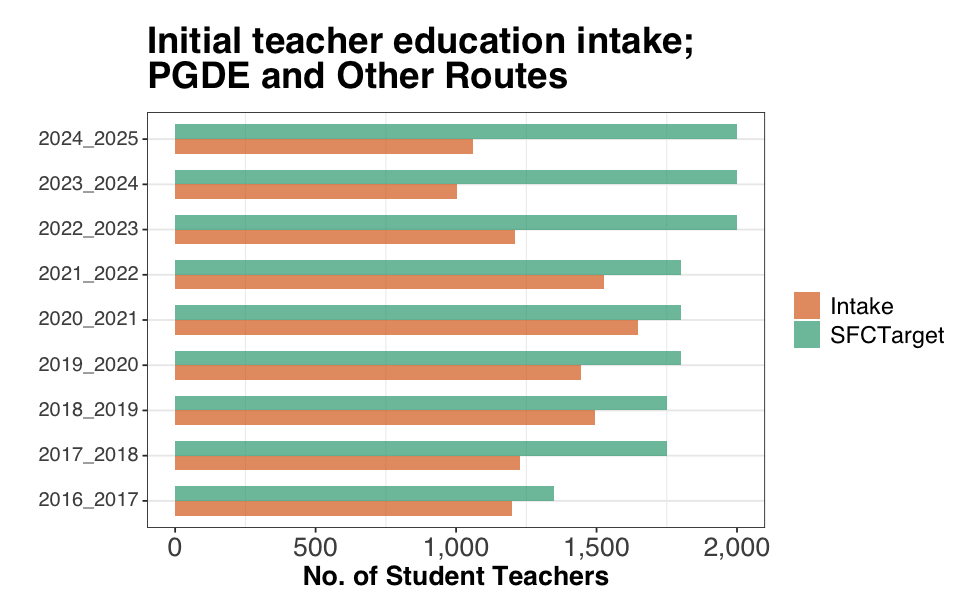

In [94]:
plot_height <- (n_distinct(initial_intake_pgde_secondary$year) + 
                n_distinct(initial_intake_pgde_secondary_and_alt_routes$year) + 
                1) / 2

options(repr.plot.width = 8, repr.plot.height = plot_height)

initial_intake_pgde_secondary %>%
    rename(Intake = ITEIntake) %>%

    rbind(initial_intake_pgde_secondary_and_alt_routes) %>%
    
    group_by(year) %>%
    summarise(across(c(SFCTarget, Intake), ~ sum(., na.rm = TRUE))) %>%
    pivot_longer(!year, names_to = "category", values_to = "count") %>%

    ggplot(aes(y = year, x = count)) +
        geom_col(aes(fill = category), width = 0.65, alpha = 0.65, position = "dodge", na.rm = TRUE) +
        scale_fill_brewer("statistics", palette = "Dark2", direction = -1) +
        dressCodeTheme +
        ggtitle("Initial teacher education intake; \nPGDE and Other Routes") +
        ylab("") +
        xlab("No. of Student Teachers") +
        scale_x_continuous(labels = scales::comma) +  #label_number_si()) + 
        dressCodeTheme  +
        theme(axis.text.y = element_markdown(),
              axis.text.x = element_text(size = 16), 
              legend.title = element_blank(),
              )  


In [96]:
initial_intake_pgde_secondary_and_alt_routes %>%
    slice_sample(n = 8) %>%
    pivot_longer(!c(Subject, year), names_to = "category", values_to = "count")

Subject,year,category,count
<chr>,<chr>,<chr>,<int>
Home Economics,2021_2022,SFCTarget,129
Home Economics,2021_2022,Intake,106
Home Economics,2022_2023,SFCTarget,141
Home Economics,2022_2023,Intake,82
Modern Languages,2020_2021,SFCTarget,119
Modern Languages,2020_2021,Intake,117
Maths,2021_2022,SFCTarget,224
Maths,2021_2022,Intake,172
Home Economics,2019_2020,SFCTarget,134


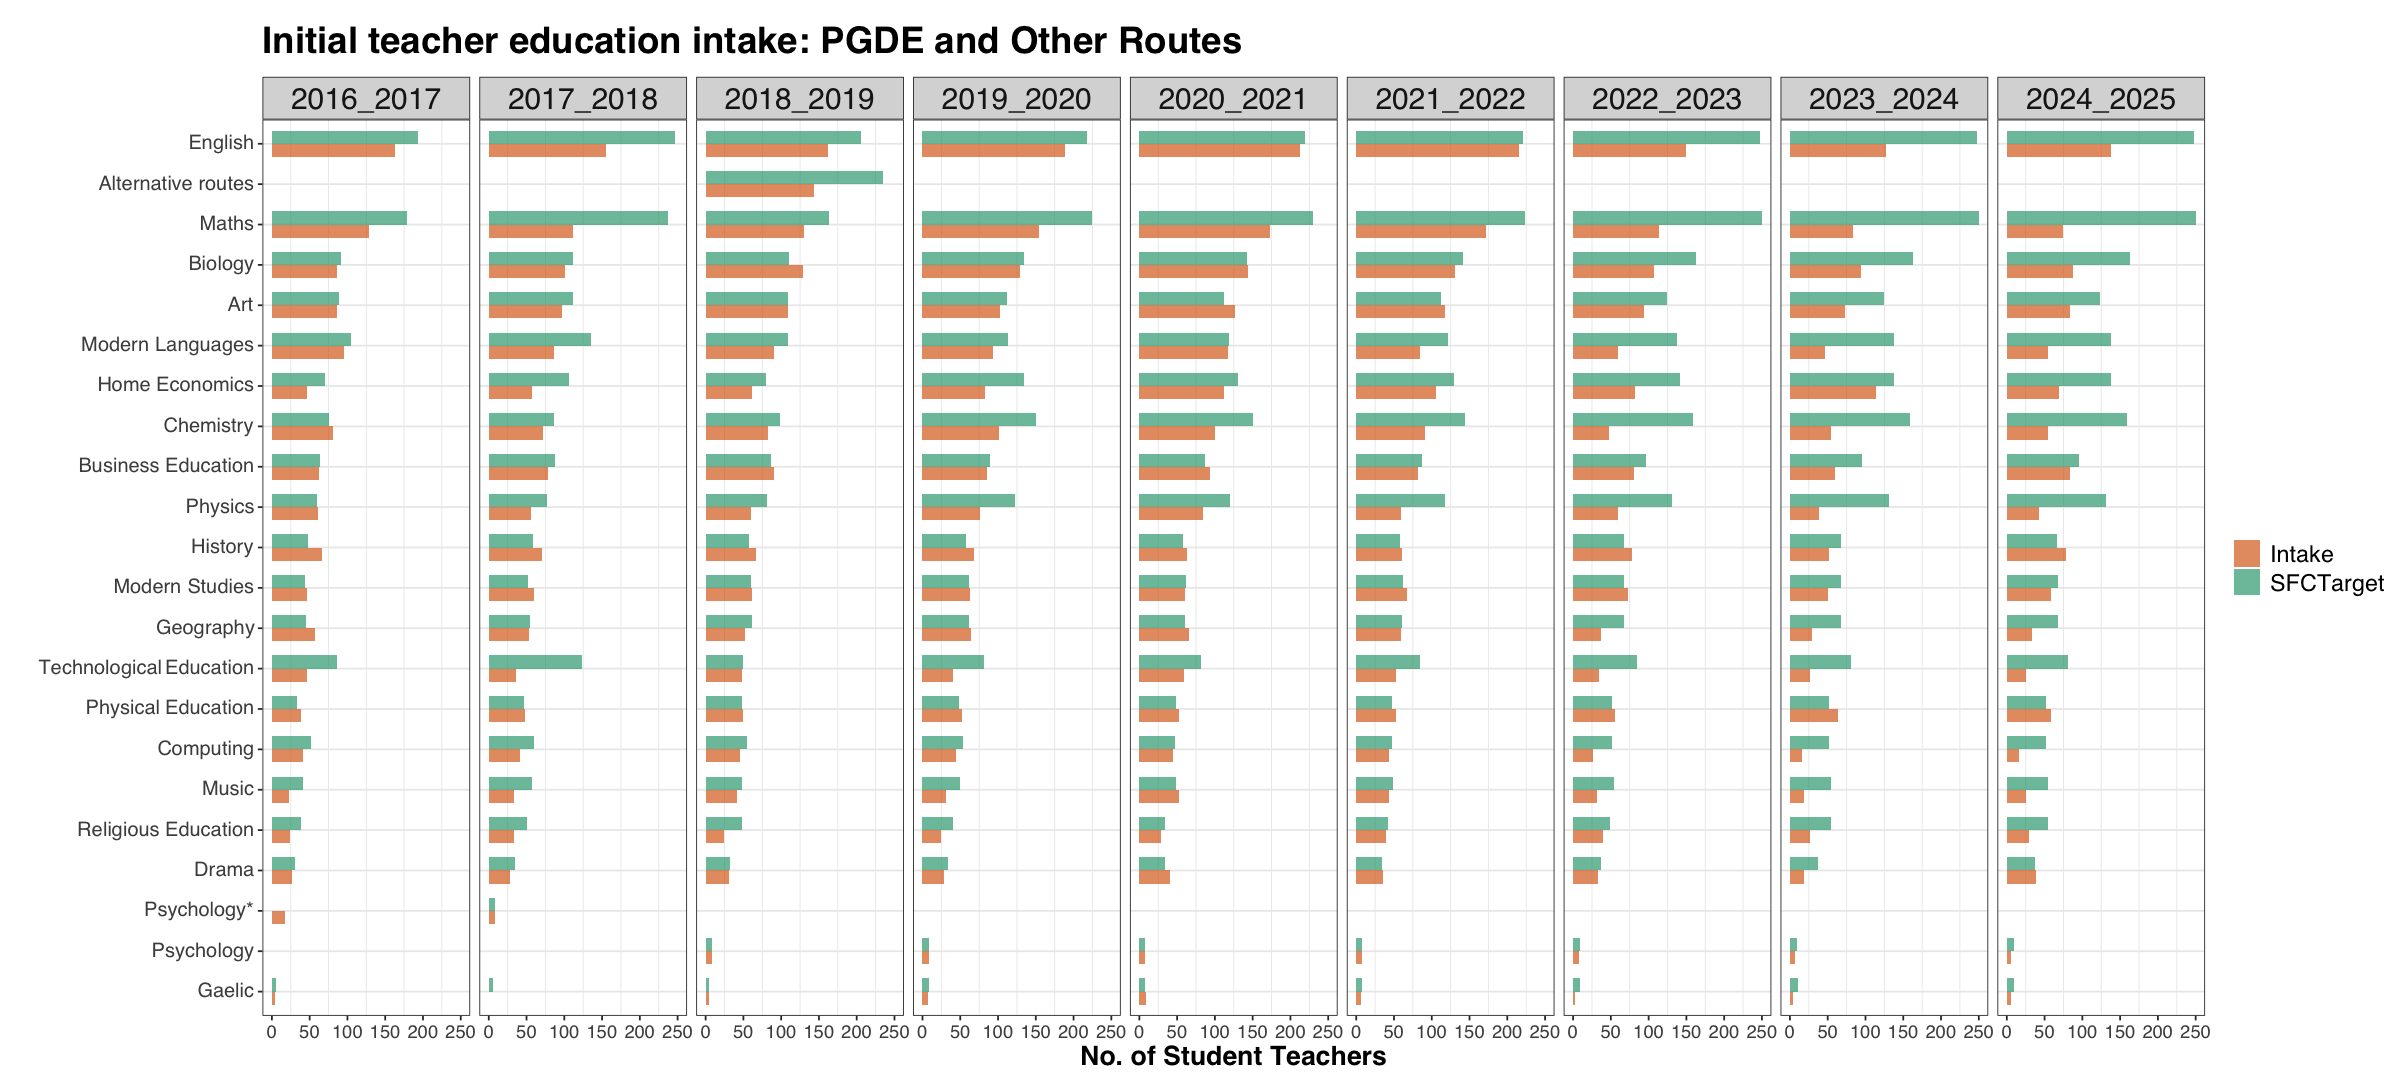

In [98]:
plot_width <- (n_distinct(initial_intake_pgde_secondary$year) + 
                n_distinct(initial_intake_pgde_secondary_and_alt_routes$year) + 
                1) * 2
options(repr.plot.width = plot_width, repr.plot.height = 9)

initial_intake_pgde_secondary %>%
    rename(Intake = ITEIntake) %>%

    rbind(initial_intake_pgde_secondary_and_alt_routes) %>%
    
    pivot_longer(!c(Subject, year), names_to = "category", values_to = "count") %>%

    ggplot(aes(y = fct_reorder(Subject, count, .na_rm = TRUE), x = count)) +
        geom_col(aes(fill = category), width = 0.65, alpha = 0.65, position = "dodge", na.rm = TRUE) +
        scale_fill_brewer("statistics", palette = "Dark2", direction = -1) +
        dressCodeTheme +
        ggtitle("Initial teacher education intake: PGDE and Other Routes") +
        ylab("") +
        xlab("No. of Student Teachers") +
        scale_x_continuous(labels = scales::comma) +  #label_number_si()) + 
        dressCodeTheme  +
        theme(axis.text.y = element_markdown(),
              axis.text.x = element_text(size = 11), 
              legend.title = element_blank(),
              ) +
        facet_grid(cols = vars(year))


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


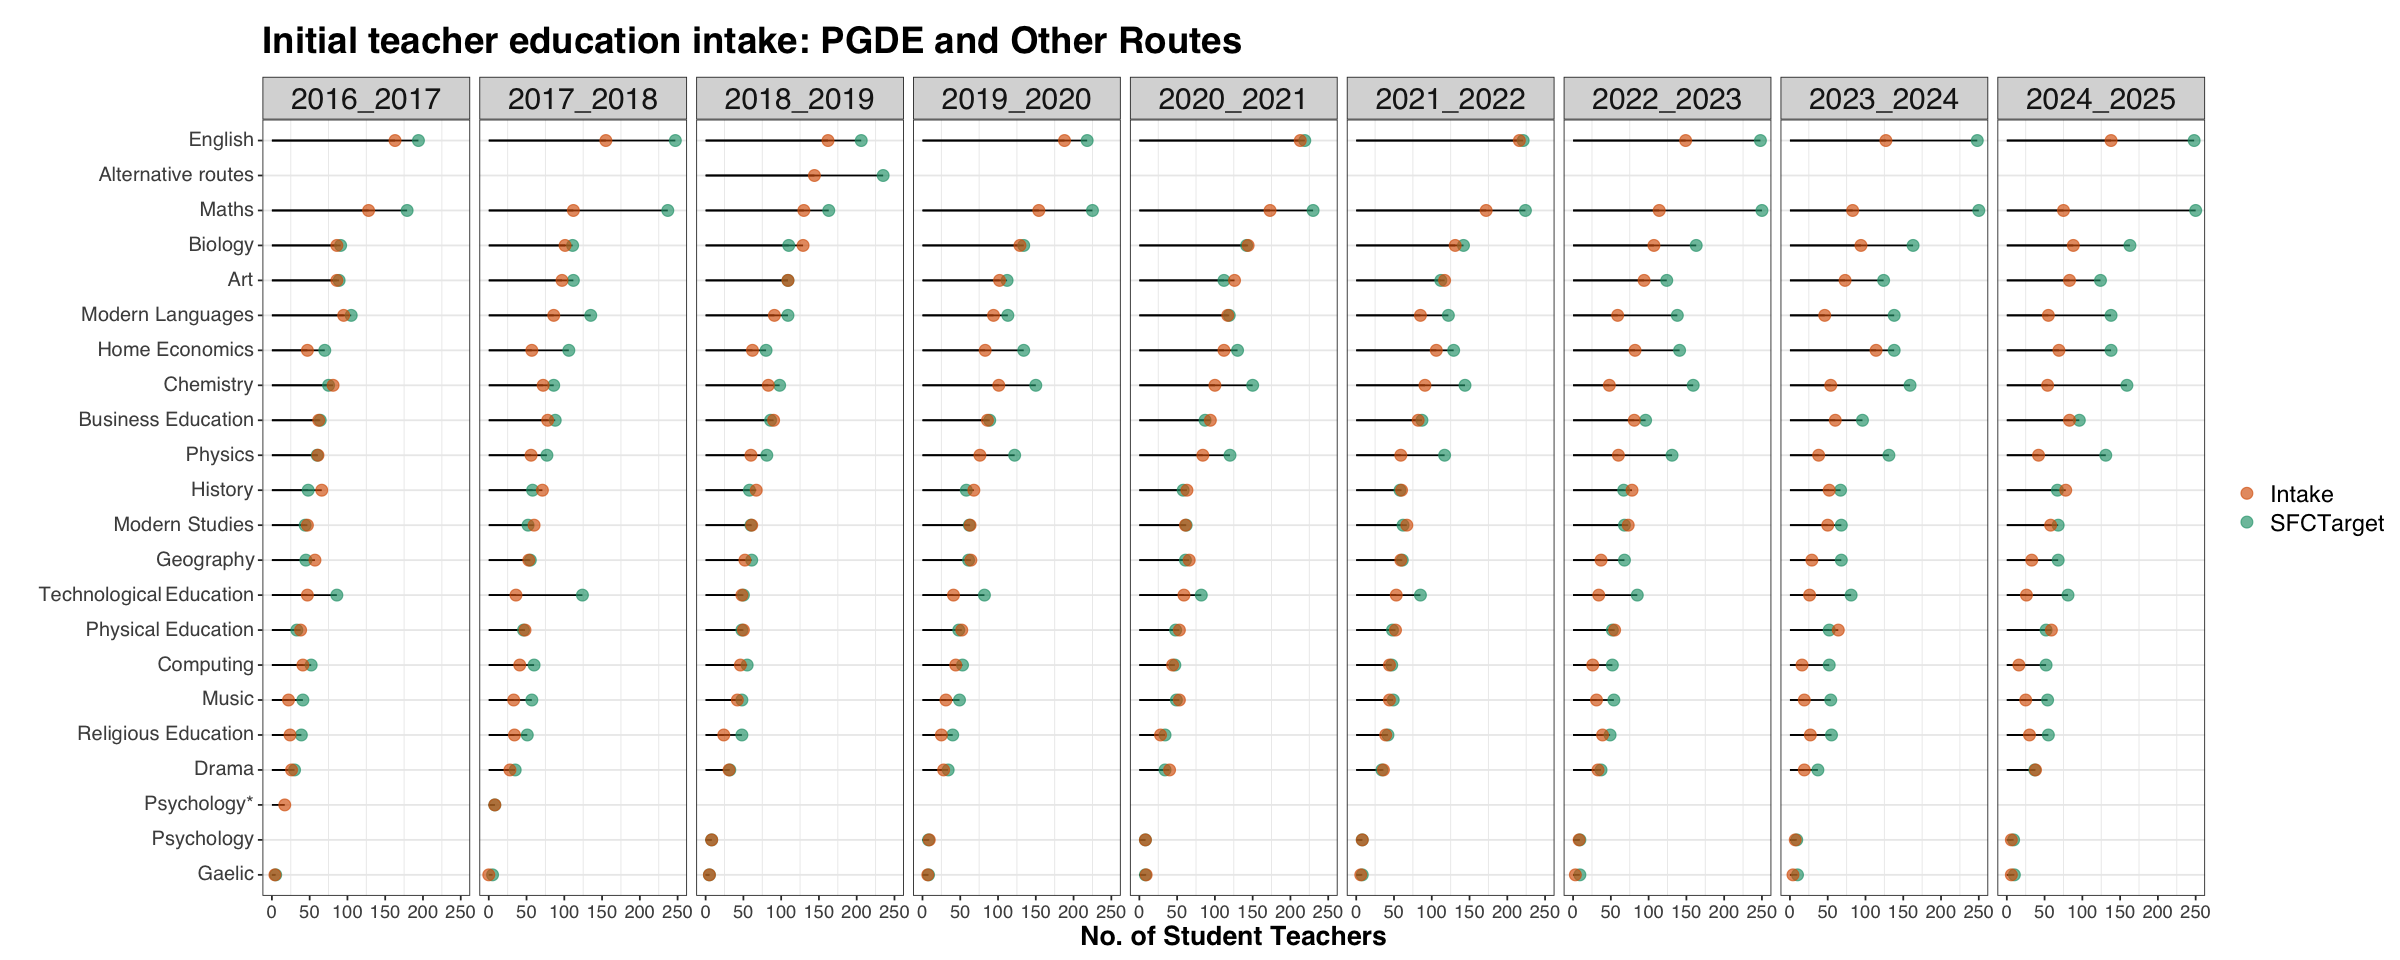

In [99]:
options(repr.plot.width = plot_width, repr.plot.height = 8)

initial_intake_pgde_secondary %>%
    rename(Intake = ITEIntake) %>%

    rbind(initial_intake_pgde_secondary_and_alt_routes) %>%
    
    pivot_longer(!c(Subject, year), names_to = "category", values_to = "count") %>%

    ggplot(aes(y = fct_reorder(Subject, count, .na_rm = TRUE), x = count)) +
        geom_segment(aes(xend = 0, yend = Subject)) +
        geom_point(aes(colour = category), size = 3, alpha = 0.65) +
        scale_colour_brewer("statistics", palette = "Dark2", direction = -1) +
        #scale_fill_brewer("statistics", palette = "Dark2", direction = -1) +
        #scale_colour_manual(values = gender_colour_scheme) + 
        #scale_fill_manual(values = gender_colour_scheme) + 
        dressCodeTheme +
        ggtitle("Initial teacher education intake: PGDE and Other Routes") +
        ylab("") +
        xlab("No. of Student Teachers") +
        scale_x_continuous(labels = scales::comma) +  #label_number_si()) + 
        dressCodeTheme  +
        theme(axis.text.y = element_markdown(),
              axis.text.x = element_text(size = 11), 
              legend.title = element_blank(),
              ) +
        facet_grid(cols = vars(year))


In [100]:
initial_intake_university <- initial_intake_university %>%
    #distinct(ITECategory) %>%

    mutate(level = str_extract(ITECategory, "Primary|Secondary"),
           across(ITECategory, ~ if_else(is.na(level), ., str_remove(., level))),
                      
           across(ITECategory, ~ paste(., coalesce(level, ""))),
           across(where(is.character), str_squish),
          ) %>%
    #arrange(ITECategory, level) %>% 
    distinct(across(!level))

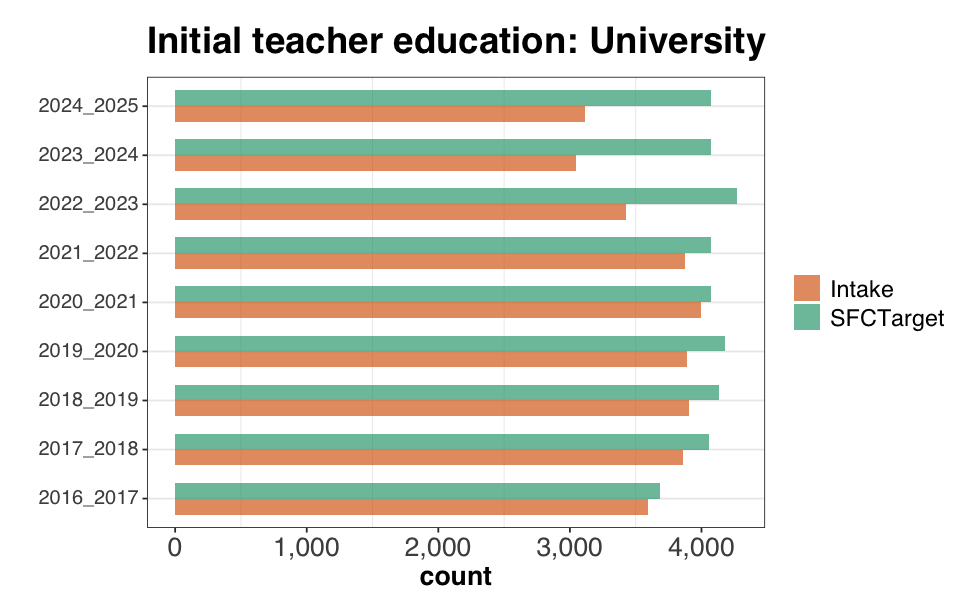

In [102]:
options(repr.plot.width = 8, repr.plot.height = plot_height)

initial_intake_university %>%
    group_by(year) %>%
    rename(SFCTarget = Target) %>%
    summarise(across(c(SFCTarget, Intake), ~ sum(., na.rm = TRUE))) %>%
    pivot_longer(!year, names_to = "category", values_to = "count") %>%

    ggplot(aes(y = year, x = count)) +
        geom_col(aes(fill = category), width = 0.65, alpha = 0.65, position = "dodge", na.rm = TRUE) +
        scale_fill_brewer("statistics", palette = "Dark2", direction = -1) +
        dressCodeTheme +
        ggtitle("Initial teacher education: University") +
        ylab("") +
        #xlab("No. of Student Teachers") +
        scale_x_continuous(labels = scales::comma) +  #label_number_si()) + 
        dressCodeTheme  +
        theme(axis.text.y = element_markdown(),
              axis.text.x = element_text(size = 16), 
              legend.title = element_blank(),
              )  


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


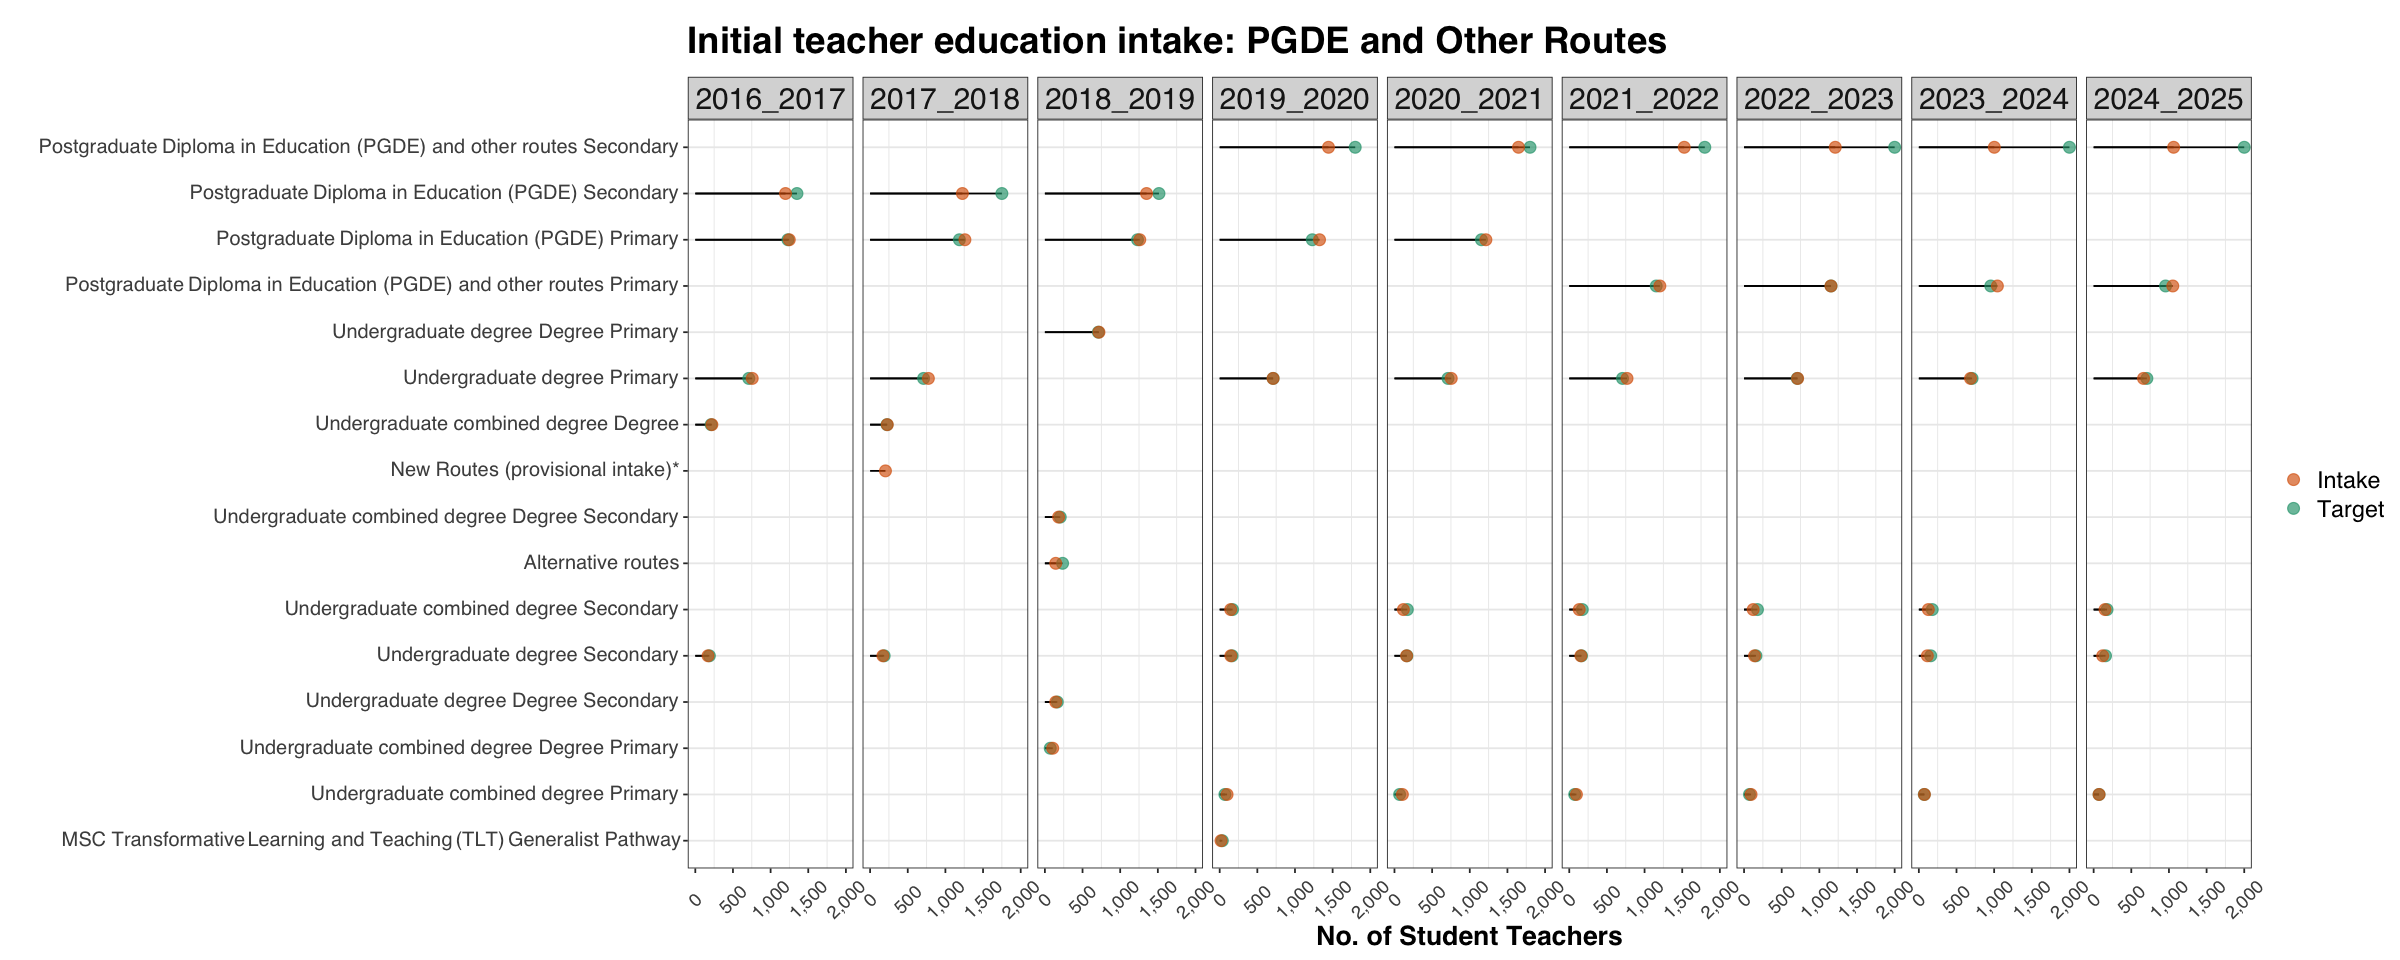

In [103]:
options(repr.plot.width = plot_width, repr.plot.height = 8)

initial_intake_university %>%
    pivot_longer(!c(ITECategory, year), names_to = "category", values_to = "count") %>%

    ggplot(aes(y = fct_reorder(ITECategory, count, .na_rm = TRUE), x = count)) +
        geom_segment(aes(xend = 0, yend = ITECategory)) +
        geom_point(aes(colour = category), size = 3, alpha = 0.65) +
        scale_colour_brewer("statistics", palette = "Dark2", direction = -1) +
        #scale_fill_brewer("statistics", palette = "Dark2", direction = -1) +
        #scale_colour_manual(values = gender_colour_scheme) + 
        #scale_fill_manual(values = gender_colour_scheme) + 
        dressCodeTheme +
        ggtitle("Initial teacher education intake: PGDE and Other Routes") +
        ylab("") +
        xlab("No. of Student Teachers") +
        scale_x_continuous(labels = scales::comma) +  #label_number_si()) + 
        dressCodeTheme  +
        theme(axis.text.y = element_markdown(),
              axis.text.x = element_text(size = 11, angle = 45, vjust = 0.5), 
              legend.title = element_blank(),
              ) +
        facet_grid(cols = vars(year))


#### <span style = "color:maroon">END &ndash; visual analysis</span>

In [ ]:
writeToDataStore ...